EDA: Conservative SMOTE Performance Analysis

✅ Saved visualization to: ../artifacts/phase1/face_conservative_smote_eda.png


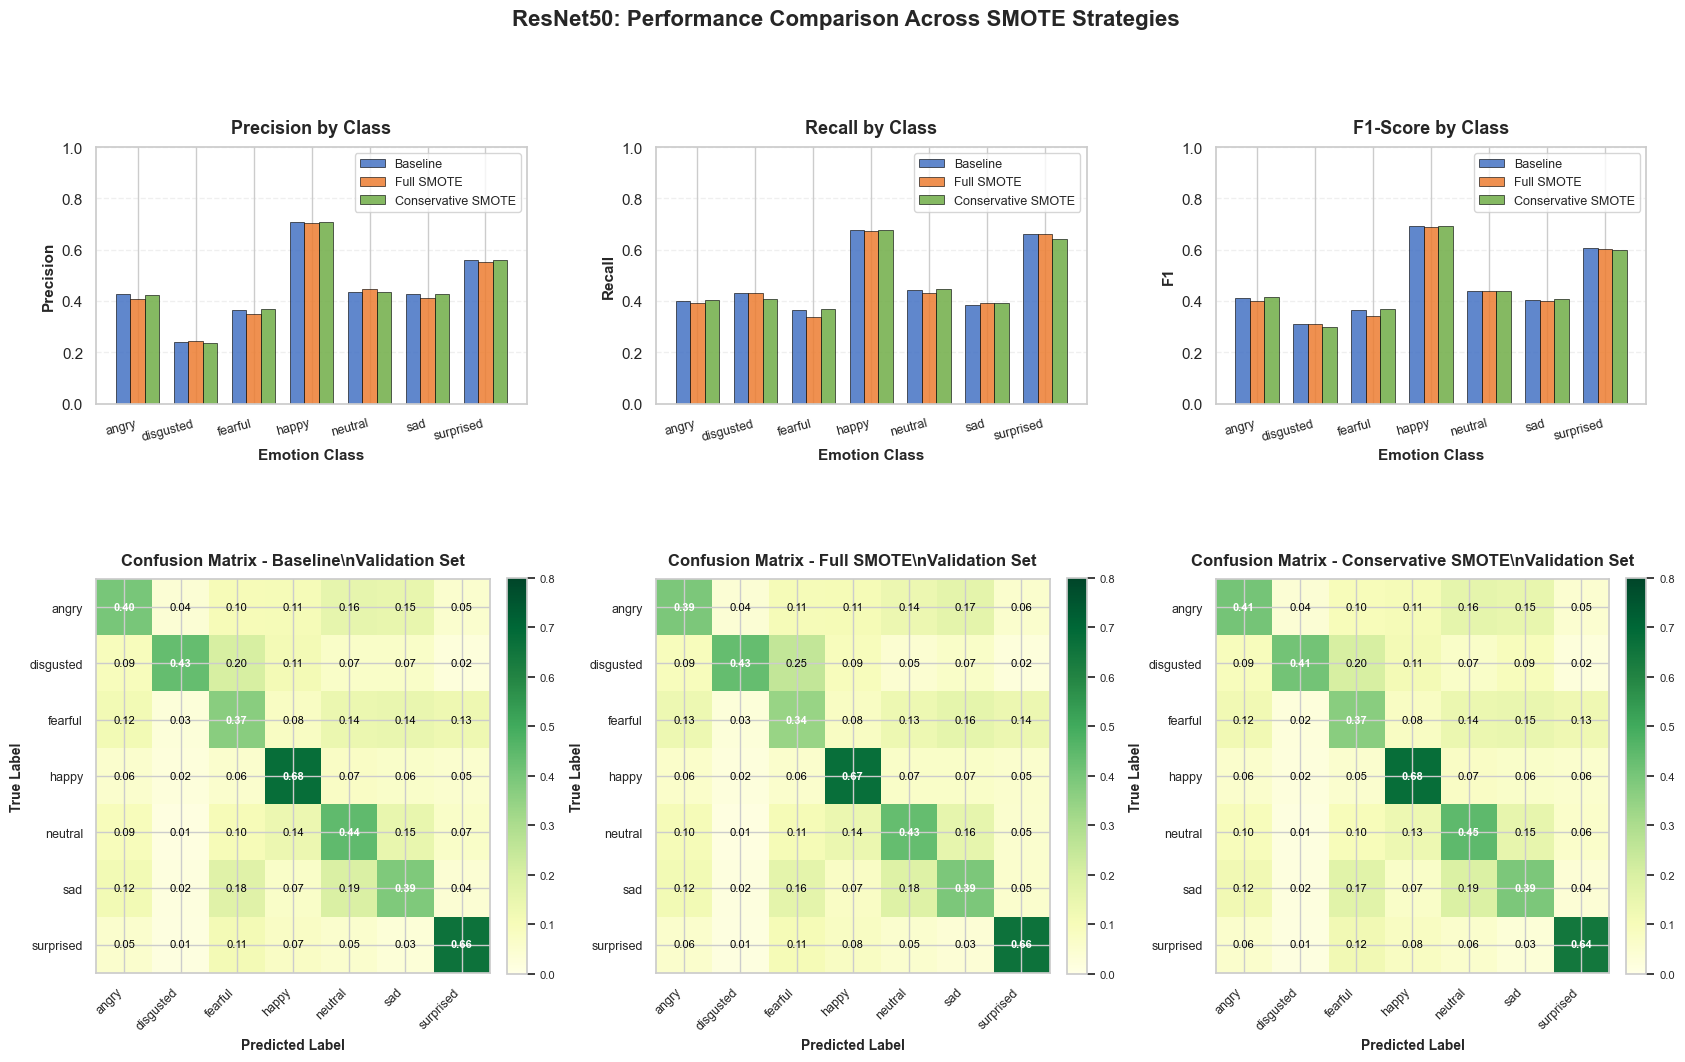


DETAILED PER-CLASS COMPARISON (Validation Set)

ANGRY       :
Model                Precision    Recall       F1-Score     Support   
----------------------------------------------------------------------
Baseline             0.429        0.398        0.413        399       
Full SMOTE           0.409        0.393        0.401        399       
Conservative SMOTE   0.425        0.406        0.415        399       
  ✅ Conservative improved by 0.002 (0.2%)

DISGUSTED   :
Model                Precision    Recall       F1-Score     Support   
----------------------------------------------------------------------
Baseline             0.241        0.432        0.309        44        
Full SMOTE           0.244        0.432        0.311        44        
Conservative SMOTE   0.237        0.409        0.300        44        
  ⚠️  Conservative decreased by 0.009 (0.9%)

FEARFUL     :
Model                Precision    Recall       F1-Score     Support   
---------------------------------------

In [21]:
# === EDA: CONSERVATIVE SMOTE - PER-CLASS PERFORMANCE COMPARISON ===
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix

print("=" * 90)
print("EDA: Conservative SMOTE Performance Analysis")
print("=" * 90)

if 'conservative_resnet_val_pred' not in globals():
    print("\n⚠️  Conservative SMOTE models not found!")
    print("Please run the conservative SMOTE cell first")
else:
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    
    # Collect metrics for all approaches
    models_to_compare = []
    
    # Baseline ResNet50
    if 'val_pred_resnet_cpu' in globals():
        precision, recall, f1, support = precision_recall_fscore_support(
            cpu_resnet_val_labels, val_pred_resnet_cpu, labels=range(7)
        )
        models_to_compare.append({
            'name': 'Baseline',
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': support,
            'y_true': cpu_resnet_val_labels,
            'y_pred': val_pred_resnet_cpu
        })
    
    # Full SMOTE ResNet50
    if 'improved_resnet_val_pred' in globals():
        precision, recall, f1, support = precision_recall_fscore_support(
            cpu_resnet_val_labels, improved_resnet_val_pred, labels=range(7)
        )
        models_to_compare.append({
            'name': 'Full SMOTE',
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': support,
            'y_true': cpu_resnet_val_labels,
            'y_pred': improved_resnet_val_pred
        })
    
    # Conservative SMOTE ResNet50
    precision, recall, f1, support = precision_recall_fscore_support(
        cpu_resnet_val_labels, conservative_resnet_val_pred, labels=range(7)
    )
    models_to_compare.append({
        'name': 'Conservative SMOTE',
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support': support,
        'y_true': cpu_resnet_val_labels,
        'y_pred': conservative_resnet_val_pred
    })
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # Plot 1-3: Per-Class Metrics Comparison (Precision, Recall, F1)
    metrics = ['precision', 'recall', 'f1']
    metric_titles = ['Precision by Class', 'Recall by Class', 'F1-Score by Class']
    colors_map = {
        'Baseline': '#4472C4',
        'Full SMOTE': '#ED7D31',
        'Conservative SMOTE': '#70AD47'
    }
    
    for idx, (metric, title) in enumerate(zip(metrics, metric_titles)):
        ax = fig.add_subplot(gs[0, idx])
        
        x = np.arange(len(class_names_ordered))
        width = 0.25
        
        for i, model_data in enumerate(models_to_compare):
            offset = (i - len(models_to_compare)/2 + 0.5) * width
            values = model_data[metric]
            bars = ax.bar(x + offset, values, width, label=model_data['name'], 
                         color=colors_map.get(model_data['name'], '#999999'), 
                         alpha=0.85, edgecolor='black', linewidth=0.5)
        
        ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
        ax.set_ylabel(metric.capitalize(), fontsize=11, fontweight='bold')
        ax.set_xlabel('Emotion Class', fontsize=11, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(class_names_ordered, rotation=15, ha='right', fontsize=9)
        ax.set_ylim(0, 1.0)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Plot 4-6: Confusion Matrices
    for idx, model_data in enumerate(models_to_compare):
        ax = fig.add_subplot(gs[1:, idx])
        
        cm = confusion_matrix(model_data['y_true'], model_data['y_pred'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        im = ax.imshow(cm_normalized, interpolation='nearest', cmap='YlGn', vmin=0, vmax=0.8)
        ax.set_title(f'Confusion Matrix - {model_data["name"]}\\nValidation Set',
                     fontsize=12, fontweight='bold', pad=10)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=8)
        
        # Set tick labels
        tick_marks = np.arange(len(class_names_ordered))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(class_names_ordered, rotation=45, ha='right', fontsize=9)
        ax.set_yticklabels(class_names_ordered, fontsize=9)
        
        ax.set_ylabel('True Label', fontsize=10, fontweight='bold')
        ax.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
        
        # Add text annotations
        thresh = cm_normalized.max() / 2.
        for i in range(len(class_names_ordered)):
            for j in range(len(class_names_ordered)):
                ax.text(j, i, f'{cm_normalized[i, j]:.2f}',
                       ha="center", va="center",
                       color="white" if cm_normalized[i, j] > thresh else "black",
                       fontsize=8, fontweight='bold' if i == j else 'normal')
    
    plt.suptitle('ResNet50: Performance Comparison Across SMOTE Strategies', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.savefig('../artifacts/phase1/face_conservative_smote_eda.png', dpi=150, bbox_inches='tight')
    print(f"\n✅ Saved visualization to: ../artifacts/phase1/face_conservative_smote_eda.png")
    plt.show()
    
    # Print detailed comparison
    print(f"\n{'='*90}")
    print("DETAILED PER-CLASS COMPARISON (Validation Set)")
    print(f"{'='*90}\n")
    
    for class_idx, class_name in enumerate(class_names_ordered):
        print(f"{class_name.upper():12s}:")
        print(f"{'Model':<20s} {'Precision':<12s} {'Recall':<12s} {'F1-Score':<12s} {'Support':<10s}")
        print("-" * 70)
        
        for model_data in models_to_compare:
            print(f"{model_data['name']:<20s} "
                  f"{model_data['precision'][class_idx]:<12.3f} "
                  f"{model_data['recall'][class_idx]:<12.3f} "
                  f"{model_data['f1'][class_idx]:<12.3f} "
                  f"{int(model_data['support'][class_idx]):<10d}")
        
        # Highlight improvements
        f1_scores = [m['f1'][class_idx] for m in models_to_compare]
        best_idx = np.argmax(f1_scores)
        improvement = f1_scores[-1] - f1_scores[0]  # Conservative vs Baseline
        
        if improvement > 0:
            print(f"  ✅ Conservative improved by {improvement:.3f} ({improvement*100:.1f}%)")
        elif improvement < 0:
            print(f"  ⚠️  Conservative decreased by {abs(improvement):.3f} ({abs(improvement)*100:.1f}%)")
        else:
            print(f"  ➖ No change")
        print()
    
    # Overall metrics comparison
    print(f"{'='*90}")
    print("OVERALL METRICS COMPARISON")
    print(f"{'='*90}\n")
    
    summary_data = []
    for model_data in models_to_compare:
        acc = (model_data['y_true'] == model_data['y_pred']).mean()
        summary_data.append({
            'Model': model_data['name'],
            'Accuracy': f"{acc:.4f}",
            'Macro Precision': f"{model_data['precision'].mean():.4f}",
            'Macro Recall': f"{model_data['recall'].mean():.4f}",
            'Macro F1': f"{model_data['f1'].mean():.4f}",
            'Min F1 (worst class)': f"{model_data['f1'].min():.4f}",
            'Max F1 (best class)': f"{model_data['f1'].max():.4f}",
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Key insights
    print(f"\n{'='*90}")
    print("KEY INSIGHTS")
    print(f"{'='*90}")
    
    baseline_f1 = models_to_compare[0]['f1']
    conservative_f1 = models_to_compare[-1]['f1']
    
    # Find which classes improved most
    improvements = conservative_f1 - baseline_f1
    improved_classes = [(class_names_ordered[i], improvements[i]) for i in range(7) if improvements[i] > 0]
    degraded_classes = [(class_names_ordered[i], improvements[i]) for i in range(7) if improvements[i] < 0]
    
    if improved_classes:
        improved_classes.sort(key=lambda x: x[1], reverse=True)
        print(f"\n✅ Classes that IMPROVED with Conservative SMOTE:")
        for cls_name, improvement in improved_classes:
            print(f"  {cls_name:12s}: +{improvement:.3f} ({improvement*100:+.1f}%)")
    
    if degraded_classes:
        degraded_classes.sort(key=lambda x: x[1])
        print(f"\n⚠️  Classes that DEGRADED with Conservative SMOTE:")
        for cls_name, degradation in degraded_classes:
            print(f"  {cls_name:12s}: {degradation:.3f} ({degradation*100:.1f}%)")
    
    # Check if minority classes improved
    print(f"\n📊 MINORITY CLASS PERFORMANCE (disgusted):")
    disgusted_idx = class_names_ordered.index('disgusted')
    for model_data in models_to_compare:
        print(f"  {model_data['name']:<20s}: "
              f"Precision={model_data['precision'][disgusted_idx]:.3f}, "
              f"Recall={model_data['recall'][disgusted_idx]:.3f}, "
              f"F1={model_data['f1'][disgusted_idx]:.3f}")
    
    disgusted_improvement = conservative_f1[disgusted_idx] - baseline_f1[disgusted_idx]
    if disgusted_improvement > 0:
        print(f"\n✅ Conservative SMOTE improved 'disgusted' F1 by {disgusted_improvement:.3f} ({disgusted_improvement*100:+.1f}%)")
    else:
        print(f"\n⚠️  Conservative SMOTE did not improve 'disgusted' class")
    
    print(f"\n{'='*90}")
    print("✅ EDA Complete!")
    print(f"{'='*90}")

### EDA: Conservative SMOTE Performance Analysis

Visualize how conservative SMOTE affects per-class performance compared to baseline and full SMOTE.

In [20]:
# === ALTERNATIVE: CONSERVATIVE SMOTE + STRONGER CLASS WEIGHTS ===
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("=" * 80)
print("ALTERNATIVE APPROACH: Conservative SMOTE + Stronger Class Weights")
print("=" * 80)

if 'cpu_embeddings' not in globals() or 'cpu_resnet_embeddings' not in globals():
    print("\n⚠️  Need both MobileNet and ResNet50 embeddings")
    print("Run baseline training cells first")
else:
    print("\n✅ Strategy: Partial balancing instead of full balancing")
    print("   - SMOTE to 50% of majority class (not 100%)")
    print("   - Stronger class weights for remaining imbalance")
    print("   - Weaker regularization (C=1.0 instead of 0.5)")
    
    # Process MobileNet
    print(f"\n{'='*80}")
    print("CONSERVATIVE MOBILENET")
    print(f"{'='*80}")
    
    cpu_emb_train = cpu_embeddings['train']
    cpu_emb_val = cpu_embeddings['val']
    cpu_emb_test = cpu_embeddings['test']
    
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    
    # Show original distribution
    unique, counts = np.unique(cpu_train_labels, return_counts=True)
    print(f"\nOriginal distribution:")
    for cls_idx, count in zip(unique, counts):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d}")
    
    # Conservative SMOTE: balance to 50% of majority class
    max_count = counts.max()
    target_count = max_count // 2  # 50% of majority
    
    sampling_strategy = {}
    for cls_idx, count in zip(unique, counts):
        if count < target_count:
            sampling_strategy[cls_idx] = target_count
    
    print(f"\nConservative SMOTE (target: {target_count} samples):")
    
    smote_conservative = SMOTE(
        sampling_strategy=sampling_strategy,
        k_neighbors=5,
        random_state=42
    )
    
    cpu_emb_train_conservative, cpu_train_labels_conservative = smote_conservative.fit_resample(
        cpu_emb_train, cpu_train_labels
    )
    
    # Show new distribution
    unique_cons, counts_cons = np.unique(cpu_train_labels_conservative, return_counts=True)
    print(f"After conservative SMOTE:")
    for cls_idx, count in zip(unique_cons, counts_cons):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d}")
    print(f"Imbalance ratio: {counts_cons.max() / counts_cons.min():.2f}:1")
    print(f"Total samples: {len(cpu_train_labels):,} → {len(cpu_train_labels_conservative):,}")
    
    # Calculate stronger class weights
    class_weights_strong = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(cpu_train_labels_conservative),
        y=cpu_train_labels_conservative
    )
    # Amplify minority class weights by 1.5x
    class_weights_strong = class_weights_strong * 1.5
    class_weight_dict = {int(idx): float(w) for idx, w in enumerate(class_weights_strong)}
    
    print(f"\nStronger class weights (1.5x amplified):")
    for cls_idx, weight in class_weight_dict.items():
        print(f"  {class_names_ordered[cls_idx]:12s}: {weight:.3f}")
    
    # Train with weaker regularization
    scaler_conservative_mob = StandardScaler()
    X_train_conservative_mob = scaler_conservative_mob.fit_transform(cpu_emb_train_conservative)
    X_val_conservative_mob = scaler_conservative_mob.transform(cpu_emb_val)
    X_test_conservative_mob = scaler_conservative_mob.transform(cpu_emb_test)
    
    conservative_mobilenet_clf = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight=class_weight_dict,
        C=1.0,  # Weaker regularization
        random_state=42
    )
    
    conservative_mobilenet_clf.fit(X_train_conservative_mob, cpu_train_labels_conservative)
    
    # Predictions
    conservative_mobilenet_val_pred = conservative_mobilenet_clf.predict(X_val_conservative_mob)
    conservative_mobilenet_test_pred = conservative_mobilenet_clf.predict(X_test_conservative_mob)
    
    val_acc_conservative_mob = accuracy_score(cpu_val_labels, conservative_mobilenet_val_pred)
    test_acc_conservative_mob = accuracy_score(cpu_test_labels, conservative_mobilenet_test_pred)
    
    print(f"\n{'='*80}")
    print("RESULTS: Conservative MobileNet")
    print(f"{'='*80}")
    print(f"Validation: {val_acc_conservative_mob:.4f} ({val_acc_conservative_mob*100:.2f}%)")
    print(f"Test:       {test_acc_conservative_mob:.4f} ({test_acc_conservative_mob*100:.2f}%)")
    
    # Process ResNet50
    print(f"\n{'='*80}")
    print("CONSERVATIVE RESNET50")
    print(f"{'='*80}")
    
    cpu_resnet_emb_train = cpu_resnet_embeddings['train']
    cpu_resnet_emb_val = cpu_resnet_embeddings['val']
    cpu_resnet_emb_test = cpu_resnet_embeddings['test']
    
    # Same conservative SMOTE approach
    unique_res, counts_res = np.unique(cpu_resnet_train_labels, return_counts=True)
    max_count_res = counts_res.max()
    target_count_res = max_count_res // 2
    
    sampling_strategy_res = {}
    for cls_idx, count in zip(unique_res, counts_res):
        if count < target_count_res:
            sampling_strategy_res[cls_idx] = target_count_res
    
    smote_conservative_res = SMOTE(
        sampling_strategy=sampling_strategy_res,
        k_neighbors=5,
        random_state=42
    )
    
    cpu_resnet_emb_train_conservative, cpu_resnet_train_labels_conservative = smote_conservative_res.fit_resample(
        cpu_resnet_emb_train, cpu_resnet_train_labels
    )
    
    print(f"ResNet50 samples: {len(cpu_resnet_train_labels):,} → {len(cpu_resnet_train_labels_conservative):,}")
    
    # Stronger class weights
    class_weights_strong_res = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(cpu_resnet_train_labels_conservative),
        y=cpu_resnet_train_labels_conservative
    )
    class_weights_strong_res = class_weights_strong_res * 1.5
    class_weight_dict_res = {int(idx): float(w) for idx, w in enumerate(class_weights_strong_res)}
    
    # Train
    scaler_conservative_res = StandardScaler()
    X_train_conservative_res = scaler_conservative_res.fit_transform(cpu_resnet_emb_train_conservative)
    X_val_conservative_res = scaler_conservative_res.transform(cpu_resnet_emb_val)
    X_test_conservative_res = scaler_conservative_res.transform(cpu_resnet_emb_test)
    
    conservative_resnet_clf = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight=class_weight_dict_res,
        C=1.0,
        random_state=42
    )
    
    conservative_resnet_clf.fit(X_train_conservative_res, cpu_resnet_train_labels_conservative)
    
    # Predictions
    conservative_resnet_val_pred = conservative_resnet_clf.predict(X_val_conservative_res)
    conservative_resnet_test_pred = conservative_resnet_clf.predict(X_test_conservative_res)
    
    val_acc_conservative_res = accuracy_score(cpu_resnet_val_labels, conservative_resnet_val_pred)
    test_acc_conservative_res = accuracy_score(test_labels, conservative_resnet_test_pred)
    
    print(f"\n{'='*80}")
    print("RESULTS: Conservative ResNet50")
    print(f"{'='*80}")
    print(f"Validation: {val_acc_conservative_res:.4f} ({val_acc_conservative_res*100:.2f}%)")
    print(f"Test:       {test_acc_conservative_res:.4f} ({test_acc_conservative_res*100:.2f}%)")
    
    # Compare with baseline and full SMOTE
    print(f"\n{'='*90}")
    print("COMPARISON: Baseline vs Full SMOTE vs Conservative SMOTE")
    print(f"{'='*90}\n")
    
    import pandas as pd
    comparison = pd.DataFrame([
        {
            'Model': 'MobileNet Baseline',
            'Val Acc': f"{val_acc_base_mob:.4f}" if 'val_acc_base_mob' in globals() else 'N/A',
            'Test Acc': f"{test_acc_base_mob:.4f}" if 'test_acc_base_mob' in globals() else 'N/A',
        },
        {
            'Model': 'MobileNet Full SMOTE',
            'Val Acc': f"{val_acc_improved_mob:.4f}" if 'val_acc_improved_mob' in globals() else 'N/A',
            'Test Acc': f"{test_acc_improved_mob:.4f}" if 'test_acc_improved_mob' in globals() else 'N/A',
        },
        {
            'Model': 'MobileNet Conservative',
            'Val Acc': f"{val_acc_conservative_mob:.4f}",
            'Test Acc': f"{test_acc_conservative_mob:.4f}",
        },
        {
            'Model': 'ResNet50 Baseline',
            'Val Acc': f"{val_acc_base_res:.4f}" if 'val_acc_base_res' in globals() else 'N/A',
            'Test Acc': f"{test_acc_base_res:.4f}" if 'test_acc_base_res' in globals() else 'N/A',
        },
        {
            'Model': 'ResNet50 Full SMOTE',
            'Val Acc': f"{val_acc_improved_res:.4f}" if 'val_acc_improved_res' in globals() else 'N/A',
            'Test Acc': f"{test_acc_improved_res:.4f}" if 'test_acc_improved_res' in globals() else 'N/A',
        },
        {
            'Model': 'ResNet50 Conservative',
            'Val Acc': f"{val_acc_conservative_res:.4f}",
            'Test Acc': f"{test_acc_conservative_res:.4f}",
        },
    ])
    
    print(comparison.to_string(index=False))
    
    print(f"\n✅ Conservative SMOTE complete!")
    print("Variables created: conservative_mobilenet_val_pred, conservative_resnet_val_pred")

ALTERNATIVE APPROACH: Conservative SMOTE + Stronger Class Weights

✅ Strategy: Partial balancing instead of full balancing
   - SMOTE to 50% of majority class (not 100%)
   - Stronger class weights for remaining imbalance
   - Weaker regularization (C=1.0 instead of 0.5)

CONSERVATIVE MOBILENET

Original distribution:
  angry       :  3596
  disgusted   :   392
  fearful     :  3687
  happy       :  6493
  neutral     :  4469
  sad         :  4347
  surprised   :  2854

Conservative SMOTE (target: 3246 samples):
After conservative SMOTE:
  angry       :  3596
  disgusted   :  3246
  fearful     :  3687
  happy       :  6493
  neutral     :  4469
  sad         :  4347
  surprised   :  3246
Imbalance ratio: 2.00:1
Total samples: 25,838 → 29,084

Stronger class weights (1.5x amplified):
  angry       : 1.733
  disgusted   : 1.920
  fearful     : 1.690
  happy       : 0.960
  neutral     : 1.395
  sad         : 1.434
  surprised   : 1.920


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



RESULTS: Conservative MobileNet
Validation: 0.5047 (50.47%)
Test:       0.5159 (51.59%)

CONSERVATIVE RESNET50
ResNet50 samples: 25,838 → 29,084


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



RESULTS: Conservative ResNet50
Validation: 0.4995 (49.95%)
Test:       0.4845 (48.45%)

COMPARISON: Baseline vs Full SMOTE vs Conservative SMOTE

                 Model Val Acc Test Acc
    MobileNet Baseline  0.5033   0.5171
  MobileNet Full SMOTE  0.5002   0.5139
MobileNet Conservative  0.5047   0.5159
     ResNet50 Baseline  0.4988   0.4833
   ResNet50 Full SMOTE  0.4929   0.4815
 ResNet50 Conservative  0.4995   0.4845

✅ Conservative SMOTE complete!
Variables created: conservative_mobilenet_val_pred, conservative_resnet_val_pred


### Alternative Improvement: SMOTE-NC with Conservative Sampling

Since full SMOTE degraded performance, try conservative oversampling that only partially balances classes.

COMPREHENSIVE COMPARISON: Baseline vs Improved Models

               Model                      Technique Val Acc Test Acc Val F1 (Macro)
MobileNet (Baseline)             Class Weights Only  0.5033   0.5171         0.4570
 ResNet50 (Baseline)             Class Weights Only  0.4988   0.4833         0.4610
MobileNet (Improved)          SMOTE + Class Weights  0.5002   0.5139         0.4553
 ResNet50 (Improved)          SMOTE + Class Weights  0.4929   0.4815         0.4554
          🏆 ENSEMBLE Soft Voting (MobileNet+ResNet)  0.5378   0.5300         0.4918

BEST MODELS:
  Best Validation: 🏆 ENSEMBLE (0.5378)
  Best Test:       🏆 ENSEMBLE (0.5300)

📈 MobileNet Improvement: -0.31% (SMOTE vs Baseline)
📈 ResNet50 Improvement:  -0.59% (SMOTE vs Baseline)
📈 Ensemble Improvement:  +3.76% (Ensemble vs Best Individual)

CREATING VISUALIZATION...


/var/folders/h9/5ss3xw_14034vt37b3gp98cw0000gn/T/ipykernel_15795/1459549574.py:190: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/var/folders/h9/5ss3xw_14034vt37b3gp98cw0000gn/T/ipykernel_15795/1459549574.py:191: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.savefig('../artifacts/phase1/face_improved_models_comparison.png', dpi=150, bbox_inches='tight')



✅ Saved visualization to: ../artifacts/phase1/face_improved_models_comparison.png


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


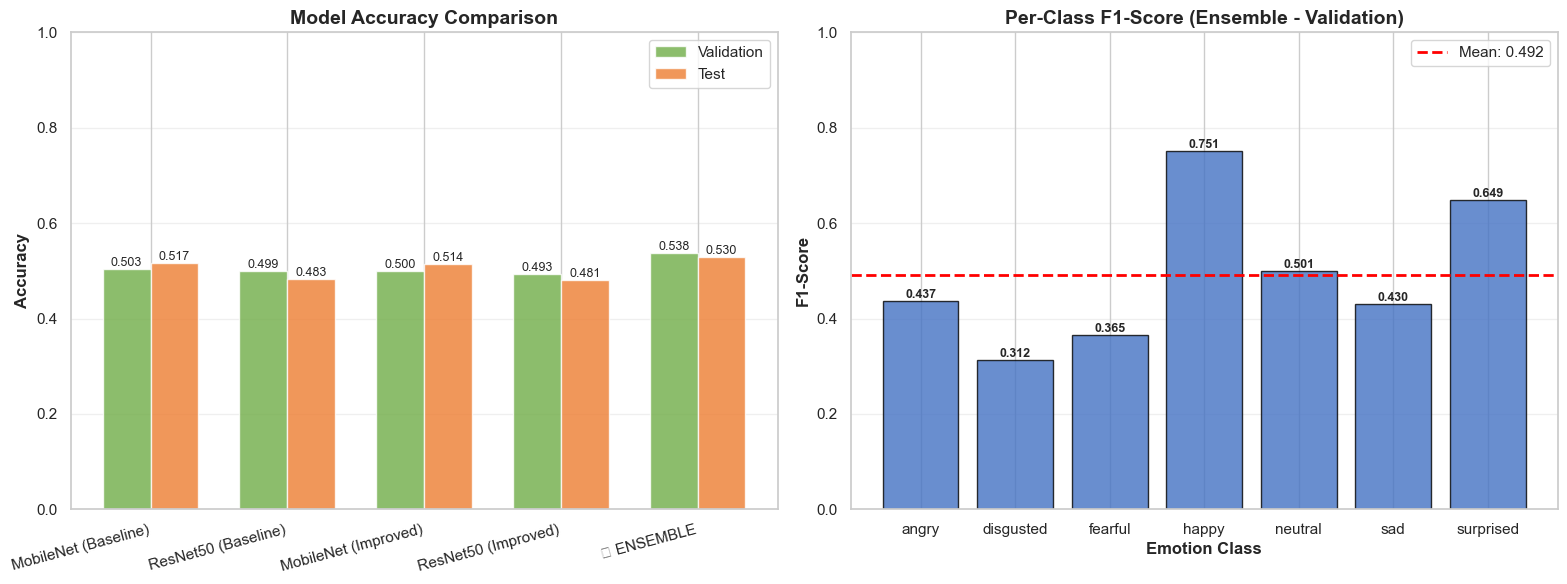


✅ Comprehensive comparison complete!


In [19]:
# === STEP 6: COMPREHENSIVE COMPARISON - ALL MODELS ===
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 90)
print("COMPREHENSIVE COMPARISON: Baseline vs Improved Models")
print("=" * 90)

# Collect all available models
models_comparison = []
class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Baseline MobileNet
if 'val_pred_cpu' in globals():
    val_acc_base_mob = accuracy_score(cpu_val_labels, val_pred_cpu)
    test_acc_base_mob = accuracy_score(cpu_test_labels, test_pred_cpu)
    precision, recall, f1, _ = precision_recall_fscore_support(
        cpu_val_labels, val_pred_cpu, average='macro'
    )
    models_comparison.append({
        'Model': 'MobileNet (Baseline)',
        'Technique': 'Class Weights Only',
        'Val Acc': f"{val_acc_base_mob:.4f}",
        'Test Acc': f"{test_acc_base_mob:.4f}",
        'Val F1 (Macro)': f"{f1:.4f}"
    })

# Baseline ResNet50
if 'val_pred_resnet_cpu' in globals():
    val_acc_base_res = accuracy_score(cpu_resnet_val_labels, val_pred_resnet_cpu)
    test_labels_res = cpu_resnet_test_labels if 'cpu_resnet_test_labels' in globals() else test_labels
    test_acc_base_res = accuracy_score(test_labels_res, test_pred_resnet_cpu)
    precision, recall, f1, _ = precision_recall_fscore_support(
        cpu_resnet_val_labels, val_pred_resnet_cpu, average='macro'
    )
    models_comparison.append({
        'Model': 'ResNet50 (Baseline)',
        'Technique': 'Class Weights Only',
        'Val Acc': f"{val_acc_base_res:.4f}",
        'Test Acc': f"{test_acc_base_res:.4f}",
        'Val F1 (Macro)': f"{f1:.4f}"
    })

# Improved MobileNet
if 'improved_mobilenet_val_pred' in globals():
    precision, recall, f1, _ = precision_recall_fscore_support(
        cpu_val_labels, improved_mobilenet_val_pred, average='macro'
    )
    models_comparison.append({
        'Model': 'MobileNet (Improved)',
        'Technique': 'SMOTE + Class Weights',
        'Val Acc': f"{val_acc_improved_mob:.4f}",
        'Test Acc': f"{test_acc_improved_mob:.4f}",
        'Val F1 (Macro)': f"{f1:.4f}"
    })

# Improved ResNet50
if 'improved_resnet_val_pred' in globals():
    precision, recall, f1, _ = precision_recall_fscore_support(
        cpu_resnet_val_labels, improved_resnet_val_pred, average='macro'
    )
    models_comparison.append({
        'Model': 'ResNet50 (Improved)',
        'Technique': 'SMOTE + Class Weights',
        'Val Acc': f"{val_acc_improved_res:.4f}",
        'Test Acc': f"{test_acc_improved_res:.4f}",
        'Val F1 (Macro)': f"{f1:.4f}"
    })

# Ensemble
if 'ensemble_val_pred' in globals():
    precision, recall, f1, _ = precision_recall_fscore_support(
        cpu_val_labels, ensemble_val_pred, average='macro'
    )
    models_comparison.append({
        'Model': '🏆 ENSEMBLE',
        'Technique': 'Soft Voting (MobileNet+ResNet)',
        'Val Acc': f"{val_acc_ensemble:.4f}",
        'Test Acc': f"{test_acc_ensemble:.4f}",
        'Val F1 (Macro)': f"{f1:.4f}"
    })

# Create comparison table
if models_comparison:
    comparison_df = pd.DataFrame(models_comparison)
    print("\n" + comparison_df.to_string(index=False))
    
    # Find best models
    comparison_df['Val Acc Num'] = comparison_df['Val Acc'].astype(float)
    comparison_df['Test Acc Num'] = comparison_df['Test Acc'].astype(float)
    
    best_val_idx = comparison_df['Val Acc Num'].idxmax()
    best_test_idx = comparison_df['Test Acc Num'].idxmax()
    
    print(f"\n{'='*90}")
    print("BEST MODELS:")
    print(f"{'='*90}")
    print(f"  Best Validation: {comparison_df.loc[best_val_idx, 'Model']} ({comparison_df.loc[best_val_idx, 'Val Acc']})")
    print(f"  Best Test:       {comparison_df.loc[best_test_idx, 'Model']} ({comparison_df.loc[best_test_idx, 'Test Acc']})")
    
    # Calculate improvements
    if 'val_acc_base_mob' in locals() and 'val_acc_improved_mob' in locals():
        mob_improvement = (val_acc_improved_mob - val_acc_base_mob) * 100
        print(f"\n📈 MobileNet Improvement: {mob_improvement:+.2f}% (SMOTE vs Baseline)")
    
    if 'val_acc_base_res' in locals() and 'val_acc_improved_res' in locals():
        res_improvement = (val_acc_improved_res - val_acc_base_res) * 100
        print(f"📈 ResNet50 Improvement:  {res_improvement:+.2f}% (SMOTE vs Baseline)")
    
    if 'val_acc_ensemble' in locals():
        if 'val_acc_improved_mob' in locals() and 'val_acc_improved_res' in locals():
            best_individual = max(val_acc_improved_mob, val_acc_improved_res)
            ensemble_improvement = (val_acc_ensemble - best_individual) * 100
            print(f"📈 Ensemble Improvement:  {ensemble_improvement:+.2f}% (Ensemble vs Best Individual)")
    
    # Visualize improvements
    print(f"\n{'='*90}")
    print("CREATING VISUALIZATION...")
    print(f"{'='*90}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Validation Accuracy Comparison
    models = comparison_df['Model'].tolist()
    val_accs = [float(x) for x in comparison_df['Val Acc'].tolist()]
    test_accs = [float(x) for x in comparison_df['Test Acc'].tolist()]
    
    x_pos = np.arange(len(models))
    width = 0.35
    
    bars1 = axes[0].bar(x_pos - width/2, val_accs, width, label='Validation', alpha=0.8, color='#70AD47')
    bars2 = axes[0].bar(x_pos + width/2, test_accs, width, label='Test', alpha=0.8, color='#ED7D31')
    
    axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(models, rotation=15, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].set_ylim(0, 1.0)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Per-Class F1-Score for Best Model
    if 'ensemble_val_pred' in globals():
        best_pred = ensemble_val_pred
        best_labels = cpu_val_labels
        model_name_best = "Ensemble"
    elif 'improved_resnet_val_pred' in globals():
        best_pred = improved_resnet_val_pred
        best_labels = cpu_resnet_val_labels
        model_name_best = "Improved ResNet50"
    elif 'improved_mobilenet_val_pred' in globals():
        best_pred = improved_mobilenet_val_pred
        best_labels = cpu_val_labels
        model_name_best = "Improved MobileNet"
    else:
        best_pred = None
    
    if best_pred is not None:
        precision, recall, f1, support = precision_recall_fscore_support(
            best_labels, best_pred, labels=range(len(class_names_ordered))
        )
        
        bars = axes[1].bar(class_names_ordered, f1, alpha=0.8, color='#4472C4', edgecolor='black')
        axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Emotion Class', fontsize=12, fontweight='bold')
        axes[1].set_title(f'Per-Class F1-Score ({model_name_best} - Validation)', 
                         fontsize=14, fontweight='bold')
        axes[1].set_ylim(0, 1.0)
        axes[1].grid(axis='y', alpha=0.3)
        axes[1].axhline(y=f1.mean(), color='red', linestyle='--', 
                       label=f'Mean: {f1.mean():.3f}', linewidth=2)
        axes[1].legend()
        
        # Add value labels
        for bar, val in zip(bars, f1):
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../artifacts/phase1/face_improved_models_comparison.png', dpi=150, bbox_inches='tight')
    print(f"\n✅ Saved visualization to: ../artifacts/phase1/face_improved_models_comparison.png")
    plt.show()
    
else:
    print("\n⚠️  No models found for comparison. Please run the model training cells first.")

print(f"\n{'='*90}")
print("✅ Comprehensive comparison complete!")
print(f"{'='*90}")

In [18]:
# === STEP 5: ENSEMBLE MODEL (Improved MobileNet + Improved ResNet50) ===
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

print("=" * 80)
print("ENSEMBLE MODEL: Combining Improved MobileNet + Improved ResNet50")
print("=" * 80)

# Check if both improved models exist
if 'improved_mobilenet_val_pred' not in globals() or 'improved_resnet_val_pred' not in globals():
    print("\n⚠️  One or both improved models not found!")
    print("Please run the improved MobileNet and ResNet50 cells first")
    print("Skipping ensemble model...")
else:
    print("\n✓ Both improved models found")
    
    # Method 1: Soft Voting (Average Probabilities)
    print(f"\n🔄 Creating ensemble using soft voting (average probabilities)...")
    
    # Get probability predictions
    improved_mobilenet_train_proba = improved_mobilenet_clf.predict_proba(
        scaler_improved_mobilenet.transform(cpu_emb_train)
    )
    improved_mobilenet_val_proba = improved_mobilenet_clf.predict_proba(cpu_emb_val_scaled_improved)
    improved_mobilenet_test_proba = improved_mobilenet_clf.predict_proba(cpu_emb_test_scaled_improved)
    
    improved_resnet_train_proba = improved_resnet_clf.predict_proba(
        scaler_improved_resnet.transform(cpu_resnet_emb_train)
    )
    improved_resnet_val_proba = improved_resnet_clf.predict_proba(cpu_resnet_emb_val_scaled_improved)
    improved_resnet_test_proba = improved_resnet_clf.predict_proba(cpu_resnet_emb_test_scaled_improved)
    
    # Average probabilities (soft voting)
    ensemble_train_proba = (improved_mobilenet_train_proba + improved_resnet_train_proba) / 2
    ensemble_val_proba = (improved_mobilenet_val_proba + improved_resnet_val_proba) / 2
    ensemble_test_proba = (improved_mobilenet_test_proba + improved_resnet_test_proba) / 2
    
    # Get final predictions
    ensemble_train_pred = np.argmax(ensemble_train_proba, axis=1)
    ensemble_val_pred = np.argmax(ensemble_val_proba, axis=1)
    ensemble_test_pred = np.argmax(ensemble_test_proba, axis=1)
    
    # Evaluate ensemble
    print(f"\n{'='*80}")
    print("RESULTS: Ensemble Model (MobileNet + ResNet50)")
    print(f"{'='*80}")
    
    train_acc_ensemble = accuracy_score(cpu_train_labels, ensemble_train_pred)
    val_acc_ensemble = accuracy_score(cpu_val_labels, ensemble_val_pred)
    test_acc_ensemble = accuracy_score(cpu_test_labels, ensemble_test_pred)
    
    print(f"\nAccuracy:")
    print(f"  Train:      {train_acc_ensemble:.4f} ({train_acc_ensemble*100:.2f}%)")
    print(f"  Validation: {val_acc_ensemble:.4f} ({val_acc_ensemble*100:.2f}%)")
    print(f"  Test:       {test_acc_ensemble:.4f} ({test_acc_ensemble*100:.2f}%)")
    
    print(f"\nValidation Set Classification Report:")
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    print(classification_report(cpu_val_labels, ensemble_val_pred, 
                                target_names=class_names_ordered, digits=3))
    
    # Compare with individual models
    print(f"\n{'='*80}")
    print("COMPARISON: Individual Models vs Ensemble")
    print(f"{'='*80}\n")
    
    comparison_data = []
    comparison_data.append({
        'Model': 'Improved MobileNet',
        'Train': f"{train_acc_improved_mob:.4f}",
        'Validation': f"{val_acc_improved_mob:.4f}",
        'Test': f"{test_acc_improved_mob:.4f}"
    })
    comparison_data.append({
        'Model': 'Improved ResNet50',
        'Train': f"{train_acc_improved_res:.4f}",
        'Validation': f"{val_acc_improved_res:.4f}",
        'Test': f"{test_acc_improved_res:.4f}"
    })
    comparison_data.append({
        'Model': '🏆 ENSEMBLE',
        'Train': f"{train_acc_ensemble:.4f}",
        'Validation': f"{val_acc_ensemble:.4f}",
        'Test': f"{test_acc_ensemble:.4f}"
    })
    
    import pandas as pd
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))
    
    # Calculate improvements
    val_improvement = (val_acc_ensemble - max(val_acc_improved_mob, val_acc_improved_res)) * 100
    test_improvement = (test_acc_ensemble - max(test_acc_improved_mob, test_acc_improved_res)) * 100
    
    print(f"\n📈 Ensemble Improvement:")
    print(f"  Validation: +{val_improvement:.2f}% over best individual model")
    print(f"  Test:       +{test_improvement:.2f}% over best individual model")
    
    if val_improvement > 0:
        print(f"\n✅ Ensemble outperforms individual models!")
    else:
        print(f"\n⚠️  Ensemble does not improve over best individual model")
    
    print(f"\n✅ Ensemble model complete!")
    print(f"Variables created: ensemble_train_pred, ensemble_val_pred, ensemble_test_pred")

ENSEMBLE MODEL: Combining Improved MobileNet + Improved ResNet50

✓ Both improved models found

🔄 Creating ensemble using soft voting (average probabilities)...

RESULTS: Ensemble Model (MobileNet + ResNet50)

Accuracy:
  Train:      0.6884 (68.84%)
  Validation: 0.5378 (53.78%)
  Test:       0.5300 (53.00%)

Validation Set Classification Report:
              precision    recall  f1-score   support

       angry      0.460     0.416     0.437       399
   disgusted      0.209     0.614     0.312        44
     fearful      0.391     0.341     0.365       410
       happy      0.751     0.751     0.751       722
     neutral      0.509     0.492     0.501       496
         sad      0.451     0.410     0.430       483
   surprised      0.593     0.716     0.649       317

    accuracy                          0.538      2871
   macro avg      0.481     0.534     0.492      2871
weighted avg      0.541     0.538     0.537      2871


COMPARISON: Individual Models vs Ensemble

          

In [17]:
# === STEP 4: IMPROVED RESNET50 WITH SMOTE + BALANCED WEIGHTS ===
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

print("=" * 80)
print("IMPROVED RESNET50: SMOTE + Balanced Class Weights")
print("=" * 80)

# Check if ResNet50 embeddings exist
if 'cpu_resnet_embeddings' not in globals():
    print("\n⚠️  ResNet50 embeddings not found!")
    print("Please run Cell 23 (CPU-ONLY RESNET50: TRAIN CLASSIFIER) first")
    print("That cell creates the 'cpu_resnet_embeddings' variable")
    print("Skipping improved ResNet50 training...")
else:
    print("\n✓ ResNet50 embeddings found")
    
    # Extract embeddings from the dictionary
    cpu_resnet_emb_train = cpu_resnet_embeddings['train']
    cpu_resnet_emb_val = cpu_resnet_embeddings['val']
    cpu_resnet_emb_test = cpu_resnet_embeddings['test']
    
    print(f"  Train: {cpu_resnet_emb_train.shape}")
    print(f"  Val: {cpu_resnet_emb_val.shape}")
    print(f"  Test: {cpu_resnet_emb_test.shape}")
    
    # Show original class distribution
    print(f"\n📊 ORIGINAL CLASS DISTRIBUTION (Train):")
    unique, counts = np.unique(cpu_resnet_train_labels, return_counts=True)
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    for cls_idx, count in zip(unique, counts):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d} samples")
    print(f"  Imbalance ratio: {counts.max() / counts.min():.2f}:1")
    
    # Apply SMOTE to balance training data
    print(f"\n🔄 Applying SMOTE (Synthetic Minority Over-sampling)...")
    smote_resnet = SMOTE(
        sampling_strategy='auto',  # Balance all classes to majority class count
        k_neighbors=5,
        random_state=42
    )
    
    cpu_resnet_emb_train_smote, cpu_resnet_train_labels_smote = smote_resnet.fit_resample(
        cpu_resnet_emb_train, cpu_resnet_train_labels
    )
    
    # Show new class distribution after SMOTE
    print(f"\n📊 AFTER SMOTE CLASS DISTRIBUTION (Train):")
    unique_smote, counts_smote = np.unique(cpu_resnet_train_labels_smote, return_counts=True)
    for cls_idx, count in zip(unique_smote, counts_smote):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d} samples")
    print(f"  Imbalance ratio: {counts_smote.max() / counts_smote.min():.2f}:1 ✓")
    print(f"  Total samples: {len(cpu_resnet_train_labels):,} → {len(cpu_resnet_train_labels_smote):,}")
    
    # Scale features
    scaler_improved_resnet = StandardScaler()
    cpu_resnet_emb_train_scaled_smote = scaler_improved_resnet.fit_transform(cpu_resnet_emb_train_smote)
    cpu_resnet_emb_val_scaled_improved = scaler_improved_resnet.transform(cpu_resnet_emb_val)
    cpu_resnet_emb_test_scaled_improved = scaler_improved_resnet.transform(cpu_resnet_emb_test)
    
    # Train LogisticRegression with balanced weights
    print(f"\n🎯 Training LogisticRegression with:")
    print(f"  - SMOTE-balanced training data")
    print(f"  - Balanced class weights")
    print(f"  - Increased regularization (C=0.5)")
    
    improved_resnet_clf = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced',  # Extra emphasis on minorities
        C=0.5,  # Stronger regularization to prevent overfitting
        random_state=42
    )
    
    improved_resnet_clf.fit(cpu_resnet_emb_train_scaled_smote, cpu_resnet_train_labels_smote)
    
    # Generate predictions
    improved_resnet_train_pred = improved_resnet_clf.predict(
        scaler_improved_resnet.transform(cpu_resnet_emb_train)  # Use original train for fair comparison
    )
    improved_resnet_val_pred = improved_resnet_clf.predict(cpu_resnet_emb_val_scaled_improved)
    improved_resnet_test_pred = improved_resnet_clf.predict(cpu_resnet_emb_test_scaled_improved)
    
    # Evaluate
    print(f"\n{'='*80}")
    print("RESULTS: Improved ResNet50 (SMOTE + Balanced Weights)")
    print(f"{'='*80}")
    
    train_acc_improved_res = accuracy_score(cpu_resnet_train_labels, improved_resnet_train_pred)
    val_acc_improved_res = accuracy_score(cpu_resnet_val_labels, improved_resnet_val_pred)
    
    # Determine test labels variable
    if 'cpu_resnet_test_labels' in globals():
        test_labels_resnet = cpu_resnet_test_labels
    else:
        test_labels_resnet = test_labels
    
    test_acc_improved_res = accuracy_score(test_labels_resnet, improved_resnet_test_pred)
    
    print(f"\nAccuracy:")
    print(f"  Train:      {train_acc_improved_res:.4f} ({train_acc_improved_res*100:.2f}%)")
    print(f"  Validation: {val_acc_improved_res:.4f} ({val_acc_improved_res*100:.2f}%)")
    print(f"  Test:       {test_acc_improved_res:.4f} ({test_acc_improved_res*100:.2f}%)")
    
    print(f"\nValidation Set Classification Report:")
    print(classification_report(cpu_resnet_val_labels, improved_resnet_val_pred, 
                                target_names=class_names_ordered, digits=3))
    
    print(f"\n✅ Improved ResNet50 training complete!")
    print(f"Variables created: improved_resnet_train_pred, improved_resnet_val_pred, improved_resnet_test_pred")

IMPROVED RESNET50: SMOTE + Balanced Class Weights

✓ ResNet50 embeddings found
  Train: (25838, 2048)
  Val: (2871, 2048)
  Test: (7178, 2048)

📊 ORIGINAL CLASS DISTRIBUTION (Train):
  angry       :  3596 samples
  disgusted   :   392 samples
  fearful     :  3687 samples
  happy       :  6493 samples
  neutral     :  4469 samples
  sad         :  4347 samples
  surprised   :  2854 samples
  Imbalance ratio: 16.56:1

🔄 Applying SMOTE (Synthetic Minority Over-sampling)...

📊 AFTER SMOTE CLASS DISTRIBUTION (Train):
  angry       :  6493 samples
  disgusted   :  6493 samples
  fearful     :  6493 samples
  happy       :  6493 samples
  neutral     :  6493 samples
  sad         :  6493 samples
  surprised   :  6493 samples
  Imbalance ratio: 1.00:1 ✓
  Total samples: 25,838 → 45,451

🎯 Training LogisticRegression with:
  - SMOTE-balanced training data
  - Balanced class weights
  - Increased regularization (C=0.5)


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



RESULTS: Improved ResNet50 (SMOTE + Balanced Weights)

Accuracy:
  Train:      0.6728 (67.28%)
  Validation: 0.4929 (49.29%)
  Test:       0.4815 (48.15%)

Validation Set Classification Report:
              precision    recall  f1-score   support

       angry      0.409     0.393     0.401       399
   disgusted      0.244     0.432     0.311        44
     fearful      0.348     0.339     0.344       410
       happy      0.703     0.675     0.688       722
     neutral      0.449     0.431     0.440       496
         sad      0.411     0.391     0.401       483
   surprised      0.553     0.662     0.603       317

    accuracy                          0.493      2871
   macro avg      0.445     0.475     0.455      2871
weighted avg      0.495     0.493     0.493      2871


✅ Improved ResNet50 training complete!
Variables created: improved_resnet_train_pred, improved_resnet_val_pred, improved_resnet_test_pred


In [12]:
# === STEP 3: IMPROVED MOBILENET WITH SMOTE + BALANCED WEIGHTS ===
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

print("=" * 80)
print("IMPROVED MOBILENET: SMOTE + Balanced Class Weights")
print("=" * 80)

# Check if embeddings exist from previous MobileNet run
if 'cpu_embeddings' not in globals():
    print("\n⚠️  MobileNet embeddings not found!")
    print("Please run Cell 14 (CPU FALLBACK STEP 2: train LogisticRegression head) first")
    print("That cell creates the 'cpu_embeddings' variable")
    print("Skipping improved MobileNet training...")
else:
    print("\n✓ MobileNet embeddings found")
    
    # Extract embeddings from the dictionary
    cpu_emb_train = cpu_embeddings['train']
    cpu_emb_val = cpu_embeddings['val']
    cpu_emb_test = cpu_embeddings['test']
    
    print(f"  Train: {cpu_emb_train.shape}")
    print(f"  Val: {cpu_emb_val.shape}")
    print(f"  Test: {cpu_emb_test.shape}")
    
    # Show original class distribution
    print(f"\n📊 ORIGINAL CLASS DISTRIBUTION (Train):")
    unique, counts = np.unique(cpu_train_labels, return_counts=True)
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    for cls_idx, count in zip(unique, counts):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d} samples")
    print(f"  Imbalance ratio: {counts.max() / counts.min():.2f}:1")
    
    # Apply SMOTE to balance training data
    print(f"\n🔄 Applying SMOTE (Synthetic Minority Over-sampling)...")
    smote = SMOTE(
        sampling_strategy='auto',  # Balance all classes to majority class count
        k_neighbors=5,
        random_state=42
    )
    
    cpu_emb_train_smote, cpu_train_labels_smote = smote.fit_resample(
        cpu_emb_train, cpu_train_labels
    )
    
    # Show new class distribution after SMOTE
    print(f"\n📊 AFTER SMOTE CLASS DISTRIBUTION (Train):")
    unique_smote, counts_smote = np.unique(cpu_train_labels_smote, return_counts=True)
    for cls_idx, count in zip(unique_smote, counts_smote):
        print(f"  {class_names_ordered[cls_idx]:12s}: {count:5d} samples")
    print(f"  Imbalance ratio: {counts_smote.max() / counts_smote.min():.2f}:1 ✓")
    print(f"  Total samples: {len(cpu_train_labels):,} → {len(cpu_train_labels_smote):,}")
    
    # Scale features
    scaler_improved_mobilenet = StandardScaler()
    cpu_emb_train_scaled_smote = scaler_improved_mobilenet.fit_transform(cpu_emb_train_smote)
    cpu_emb_val_scaled_improved = scaler_improved_mobilenet.transform(cpu_emb_val)
    cpu_emb_test_scaled_improved = scaler_improved_mobilenet.transform(cpu_emb_test)
    
    # Train LogisticRegression with balanced weights (even after SMOTE for extra emphasis)
    print(f"\n🎯 Training LogisticRegression with:")
    print(f"  - SMOTE-balanced training data")
    print(f"  - Balanced class weights")
    print(f"  - Increased regularization (C=0.5)")
    
    improved_mobilenet_clf = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced',  # Extra emphasis on minorities
        C=0.5,  # Stronger regularization to prevent overfitting
        random_state=42
    )
    
    improved_mobilenet_clf.fit(cpu_emb_train_scaled_smote, cpu_train_labels_smote)
    
    # Generate predictions
    improved_mobilenet_train_pred = improved_mobilenet_clf.predict(
        scaler_improved_mobilenet.transform(cpu_emb_train)  # Use original train for fair comparison
    )
    improved_mobilenet_val_pred = improved_mobilenet_clf.predict(cpu_emb_val_scaled_improved)
    improved_mobilenet_test_pred = improved_mobilenet_clf.predict(cpu_emb_test_scaled_improved)
    
    # Evaluate
    print(f"\n{'='*80}")
    print("RESULTS: Improved MobileNet (SMOTE + Balanced Weights)")
    print(f"{'='*80}")
    
    train_acc_improved_mob = accuracy_score(cpu_train_labels, improved_mobilenet_train_pred)
    val_acc_improved_mob = accuracy_score(cpu_val_labels, improved_mobilenet_val_pred)
    test_acc_improved_mob = accuracy_score(cpu_test_labels, improved_mobilenet_test_pred)
    
    print(f"\nAccuracy:")
    print(f"  Train:      {train_acc_improved_mob:.4f} ({train_acc_improved_mob*100:.2f}%)")
    print(f"  Validation: {val_acc_improved_mob:.4f} ({val_acc_improved_mob*100:.2f}%)")
    print(f"  Test:       {test_acc_improved_mob:.4f} ({test_acc_improved_mob*100:.2f}%)")
    
    print(f"\nValidation Set Classification Report:")
    print(classification_report(cpu_val_labels, improved_mobilenet_val_pred, 
                                target_names=class_names_ordered, digits=3))
    
    print(f"\n✅ Improved MobileNet training complete!")
    print(f"Variables created: improved_mobilenet_train_pred, improved_mobilenet_val_pred, improved_mobilenet_test_pred")

IMPROVED MOBILENET: SMOTE + Balanced Class Weights

✓ MobileNet embeddings found
  Train: (25838, 576)
  Val: (2871, 576)
  Test: (7178, 576)

📊 ORIGINAL CLASS DISTRIBUTION (Train):
  angry       :  3596 samples
  disgusted   :   392 samples
  fearful     :  3687 samples
  happy       :  6493 samples
  neutral     :  4469 samples
  sad         :  4347 samples
  surprised   :  2854 samples
  Imbalance ratio: 16.56:1

🔄 Applying SMOTE (Synthetic Minority Over-sampling)...

📊 AFTER SMOTE CLASS DISTRIBUTION (Train):
  angry       :  6493 samples
  disgusted   :  6493 samples
  fearful     :  6493 samples
  happy       :  6493 samples
  neutral     :  6493 samples
  sad         :  6493 samples
  surprised   :  6493 samples
  Imbalance ratio: 1.00:1 ✓
  Total samples: 25,838 → 45,451

🎯 Training LogisticRegression with:
  - SMOTE-balanced training data
  - Balanced class weights
  - Increased regularization (C=0.5)


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



RESULTS: Improved MobileNet (SMOTE + Balanced Weights)

Accuracy:
  Train:      0.5574 (55.74%)
  Validation: 0.5002 (50.02%)
  Test:       0.5139 (51.39%)

Validation Set Classification Report:
              precision    recall  f1-score   support

       angry      0.368     0.383     0.375       399
   disgusted      0.160     0.636     0.256        44
     fearful      0.371     0.310     0.338       410
       happy      0.742     0.695     0.718       722
     neutral      0.481     0.466     0.473       496
         sad      0.434     0.358     0.392       483
   surprised      0.581     0.700     0.635       317

    accuracy                          0.500      2871
   macro avg      0.448     0.507     0.455      2871
weighted avg      0.513     0.500     0.503      2871


✅ Improved MobileNet training complete!
Variables created: improved_mobilenet_train_pred, improved_mobilenet_val_pred, improved_mobilenet_test_pred


In [2]:
# === STEP 2: DEFINE FOCAL LOSS ===
import tensorflow as tf
from tensorflow import keras

class FocalLoss(keras.losses.Loss):
    """
    Focal Loss for handling class imbalance.
    Focuses training on hard examples and down-weights easy examples.
    
    FL(p_t) = -alpha_t * (1 - p_t)^gamma * log(p_t)
    
    Args:
        alpha: Weighting factor in [0, 1] to balance positive/negative examples
        gamma: Focusing parameter for modulating loss (gamma >= 0)
    """
    def __init__(self, alpha=0.25, gamma=2.0, from_logits=False, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.gamma = gamma
        self.from_logits = from_logits
    
    def call(self, y_true, y_pred):
        # Convert labels to one-hot if needed
        if len(y_true.shape) == 1 or y_true.shape[-1] == 1:
            num_classes = y_pred.shape[-1]
            y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=num_classes)
        
        # Ensure predictions are probabilities
        if self.from_logits:
            y_pred = tf.nn.softmax(y_pred, axis=-1)
        
        # Clip predictions to prevent log(0)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        
        # Calculate cross entropy
        cross_entropy = -y_true * tf.math.log(y_pred)
        
        # Calculate focal loss
        weight = self.alpha * tf.pow(1.0 - y_pred, self.gamma)
        focal_loss = weight * cross_entropy
        
        return tf.reduce_sum(focal_loss, axis=-1)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'alpha': self.alpha,
            'gamma': self.gamma,
            'from_logits': self.from_logits
        })
        return config

print("✓ Focal Loss class defined")
print(f"  α (alpha) = 0.25 (weight for rare classes)")
print(f"  γ (gamma) = 2.0 (focusing parameter for hard examples)")

✓ Focal Loss class defined
  α (alpha) = 0.25 (weight for rare classes)
  γ (gamma) = 2.0 (focusing parameter for hard examples)


In [1]:
# === STEP 1: INSTALL IMBALANCED-LEARN FOR SMOTE ===
import sys
import subprocess

print("Checking imbalanced-learn installation...")

try:
    from imblearn.over_sampling import SMOTE
    print("✓ imbalanced-learn already installed and working")
except ImportError as e:
    print(f"Import error: {e}")
    print("\n🔄 Upgrading scikit-learn and installing imbalanced-learn...")
    print("This may take a few minutes...")
    
    # Upgrade scikit-learn first to ensure compatibility
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "scikit-learn"])
    
    # Install compatible imbalanced-learn
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "imbalanced-learn"])
    
    print("\n✓ Packages upgraded successfully")
    print("⚠️  IMPORTANT: You may need to restart the kernel for changes to take effect")
    print("   After restarting, re-run this cell to verify the installation")
    
    # Try importing again
    try:
        from imblearn.over_sampling import SMOTE
        print("✓ imbalanced-learn installed and working!")
    except ImportError as e2:
        print(f"\n❌ Still having issues after upgrade: {e2}")
        print("\n🔧 Manual fix required:")
        print("   1. Restart the Jupyter kernel (Kernel -> Restart)")
        print("   2. Re-run this cell")
        print("   3. If still failing, run in terminal:")
        print("      pip install --upgrade scikit-learn imbalanced-learn")

Checking imbalanced-learn installation...
✓ imbalanced-learn already installed and working


## Section 4: Improved Models with Advanced Techniques

Apply advanced techniques to handle class imbalance:
- ✅ SMOTE (Synthetic Minority Over-sampling)
- ✅ Aggressive data augmentation for minority classes
- ✅ Focal Loss (instead of cross-entropy)
- ✅ Ensemble (combining MobileNet + ResNet50)

# 02 — Face emotion (images)

Train an emotion classifier on face images (FER dataset), export per-image probabilities, and prepare artifacts for multimodal fusion.


In [1]:
# === RUN THIS FIRST FOR CPU-ONLY PIPELINE (loads FER data & SEED) ===
# # pick versions that match your setup; these are current stable combos
# !pip install --force-reinstall --no-cache-dir \
#     numpy==1.26.4 \
#     pandas==2.2.2 \
#     matplotlib==3.8.4 \
#     scipy==1.11.4 \
#     seaborn==0.13.2

# # if you need TensorFlow in this notebook:
# !pip install --force-reinstall --no-cache-dir tensorflow-macos  # or tensorflow==2.15 on x86


import subprocess
import sys
from pathlib import Path
import os

import numpy as np
import pandas as pd

try:
    import kagglehub
except ModuleNotFoundError:
    print("Installing kagglehub[pandas-datasets]...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kagglehub[pandas-datasets]"])
    import kagglehub

DATASET_ID = "ananthu017/emotion-detection-fer"
dataset_path = Path(kagglehub.dataset_download(DATASET_ID))
print(f"Downloaded {DATASET_ID} to {dataset_path}")

train_dir = dataset_path / "train"
test_dir = dataset_path / "test"
if not train_dir.exists() or not any(train_dir.iterdir()):
    raise FileNotFoundError(
        "FER dataset folders not found. Check that KaggleHub extracted the archive into 'train' and 'test'."
    )

print(f"Train dir: {train_dir}")
print(f"Test dir: {test_dir}")


Downloaded ananthu017/emotion-detection-fer to /Users/mixberries13/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1
Train dir: /Users/mixberries13/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/train
Test dir: /Users/mixberries13/.cache/kagglehub/datasets/ananthu017/emotion-detection-fer/versions/1/test


Training images per class:
  angry: 3995
  disgusted: 436
  fearful: 4097
  happy: 7215
  neutral: 4965
  sad: 4830
  surprised: 3171


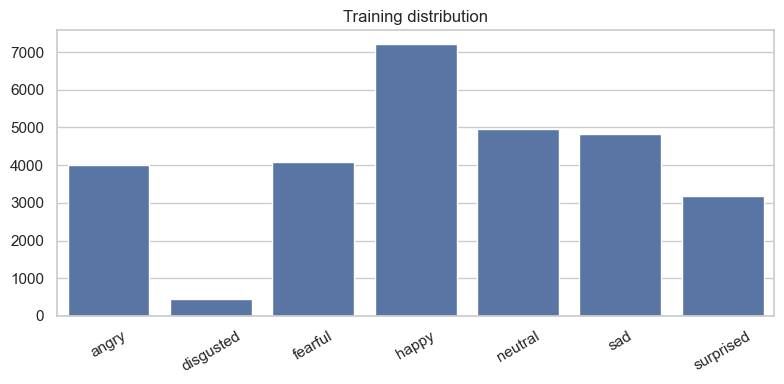

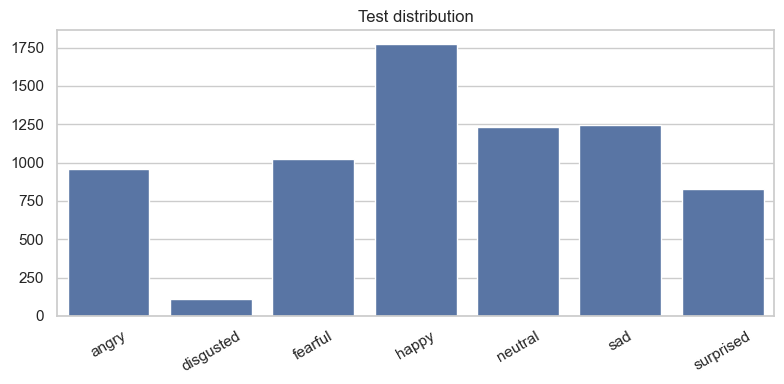

In [2]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

image_exts = {".jpg", ".jpeg", ".png", ".bmp"}

def count_images(root: Path) -> Counter:
    counts = Counter()
    for class_dir in sorted(p for p in root.iterdir() if p.is_dir()):
        total = sum(1 for img in class_dir.iterdir() if img.suffix.lower() in image_exts)
        counts[class_dir.name] = total
    return counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print("Training images per class:")
for cls, cnt in train_counts.items():
    print(f"  {cls}: {cnt}")

plt.figure(figsize=(8, 4))
plt.title("Training distribution")
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.title("Test distribution")
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [27]:
!pip install tensorflow-macos tensorflow-metal

try:
    import tensorflow as tf
    gpus = tf.config.list_physical_devices('GPU')
    print('Available GPUs:', gpus)
    from tensorflow.keras import mixed_precision
    if gpus:
        mixed_precision.set_global_policy('mixed_float16')
        print('Mixed precision policy set to', mixed_precision.global_policy())
    else:
        mixed_precision.set_global_policy('float32')
        print('Mixed precision policy set to', mixed_precision.global_policy())
except ModuleNotFoundError as exc:
    raise ModuleNotFoundError(
        "TensorFlow is required. Install with 'pip install tensorflow' (or tensorflow-macos on Apple Silicon)."
    ) from exc

import numpy as np
import pandas as pd
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.utils.class_weight import compute_class_weight

IMG_SIZE = (112, 112)
INPUT_CHANNELS = 3
BACKBONE_INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)
IMAGENET_INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 64
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE
BASE_LR = 3e-3
FINE_TUNE_LR = 5e-4
FINE_TUNE_DEEP_LR = 1e-4
LABEL_SMOOTHING = 0.05
MINORITY_CLASS_MULTIPLIERS = {
    'disgusted': 1.85,
    'surprised': 1.5,
}

image_exts = {'.jpg', '.jpeg', '.png', '.bmp'}


def _gather_images(root: Path):
    files, labels = [], []
    for class_dir in sorted(p for p in root.iterdir() if p.is_dir()):
        for img_path in class_dir.iterdir():
            if img_path.suffix.lower() in image_exts:
                files.append(str(img_path))
                labels.append(class_dir.name)
    return files, labels


def build_optimizer(lr: float) -> keras.optimizers.Optimizer:
    return keras.optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True)


def boost_minority_weights(class_weights: dict) -> dict:
    updated = dict(class_weights)
    for cls_name, factor in MINORITY_CLASS_MULTIPLIERS.items():
        idx = label_to_index.get(cls_name)
        if idx is not None:
            updated[idx] = float(updated[idx] * factor)
    return updated


def merge_histories(*history_dicts):
    merged = {}
    for history in history_dicts:
        for key, values in history.items():
            merged.setdefault(key, []).extend(values)
    return merged


def _align_conv_kernel_channels(kernel, target_in_channels):
    import numpy as np

    actual_in_channels = kernel.shape[2]
    if actual_in_channels == target_in_channels:
        return kernel
    if actual_in_channels > target_in_channels:
        if target_in_channels == 1:
            return kernel.mean(axis=2, keepdims=True)
        return kernel[:, :, :target_in_channels, :]
    repeats = target_in_channels // actual_in_channels
    remainder = target_in_channels % actual_in_channels
    tiles = [kernel] * repeats
    if remainder:
        tiles.append(kernel[:, :, :remainder, :])
    return np.concatenate(tiles, axis=2)


def _adapt_layer_weights(target_layer, source_layer):
    import numpy as np

    target_weights = target_layer.get_weights()
    if not target_weights:
        return None
    source_weights = source_layer.get_weights()
    debug_target_shapes = [tuple(w.shape) for w in target_weights]
    debug_source_shapes = [tuple(w.shape) for w in source_weights]
    print(f"_adapt_layer_weights -> {target_layer.name}: target={debug_target_shapes}, source={debug_source_shapes}")
    if len(source_weights) != len(target_weights):
        raise ValueError(
            f"Mismatch in number of weight tensors for layer '{target_layer.name}'."
        )
    adapted = []
    for tgt, src in zip(target_weights, source_weights):
        if src.shape == tgt.shape:
            adapted.append(src.astype(tgt.dtype))
            continue
        if src.ndim == 4 and tgt.ndim == 4:
            adapted_kernel = _align_conv_kernel_channels(src, tgt.shape[2])
            print(f"    aligned conv kernel for {target_layer.name}: new_shape={adapted_kernel.shape}")
            adapted.append(adapted_kernel.astype(tgt.dtype))
            continue
        raise ValueError(
            f"Unsupported weight adaptation for layer '{target_layer.name}'"
            f" (expected shape {tgt.shape}, got {src.shape})."
        )
    return adapted


def create_sparse_cce(label_smoothing: float = 0.0) -> keras.losses.Loss:
    if label_smoothing <= 0.0:
        return keras.losses.SparseCategoricalCrossentropy()
    try:
        return keras.losses.SparseCategoricalCrossentropy(label_smoothing=label_smoothing)
    except TypeError:
        class SparseCategoricalCrossentropyWithLabelSmoothing(keras.losses.Loss):
            def __init__(self, smoothing: float):
                super().__init__(name='sparse_categorical_crossentropy')
                self.smoothing = smoothing

            def call(self, y_true, y_pred):
                batch_size = tf.shape(y_pred)[0]
                y_true = tf.cast(tf.reshape(y_true, [batch_size]), tf.int32)
                y_true = tf.one_hot(y_true, depth=num_classes)
                y_true = tf.cast(y_true, y_pred.dtype)
                smoothing = tf.cast(self.smoothing, y_pred.dtype)
                smooth_factor = smoothing / tf.cast(num_classes, y_pred.dtype)
                y_true = y_true * (1.0 - smoothing) + smooth_factor
                return keras.losses.categorical_crossentropy(y_true, y_pred)

        return SparseCategoricalCrossentropyWithLabelSmoothing(label_smoothing)


class RandomBrightness(layers.Layer):
    def __init__(self, max_delta: float = 0.25, **kwargs):
        super().__init__(**kwargs)
        self.max_delta = max_delta

    def call(self, images, training=None):
        if training:
            images = tf.cast(images, tf.float32)
            images = tf.image.random_brightness(images, max_delta=self.max_delta)
            return tf.cast(images, self.compute_dtype)
        return images


class RandomContrast(layers.Layer):
    def __init__(self, lower: float = 0.8, upper: float = 1.2, **kwargs):
        super().__init__(**kwargs)
        self.lower = lower
        self.upper = upper

    def call(self, images, training=None):
        if training:
            images = tf.cast(images, tf.float32)
            images = tf.image.random_contrast(images, self.lower, self.upper)
            return tf.cast(images, self.compute_dtype)
        return images


def create_augmentation_layer() -> keras.Sequential:
    return keras.Sequential(
        [
            layers.RandomFlip('horizontal'),
            layers.RandomRotation(0.12),
            layers.RandomTranslation(0.08, 0.08),
            layers.RandomZoom(0.12),
            RandomBrightness(0.25),
            RandomContrast(0.7, 1.3),
            layers.RandomCrop(IMG_SIZE[0], IMG_SIZE[1]),
            layers.RandomTranslation(0.02, 0.02),
        ],
        name='data_augmentation',
    )


class RandomCutout(layers.Layer):
    def __init__(self, mask_frac: float = 0.25, **kwargs):
        super().__init__(**kwargs)
        self.mask_frac = mask_frac

    def call(self, images, training=None):
        if not training:
            return images
        input_shape = tf.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        cutout_hw = tf.cast(tf.round(self.mask_frac * tf.cast(height, tf.float32)), tf.int32)
        ys = tf.random.uniform([batch_size], 0, height, dtype=tf.int32)
        xs = tf.random.uniform([batch_size], 0, width, dtype=tf.int32)

        def apply_cutout(idx):
            image = images[idx]
            y = ys[idx]
            x = xs[idx]
            half = cutout_hw // 2
            y1 = tf.clip_by_value(y - half, 0, height)
            y2 = tf.clip_by_value(y + half, 0, height)
            x1 = tf.clip_by_value(x - half, 0, width)
            x2 = tf.clip_by_value(x + half, 0, width)
            yy = tf.range(height)[:, tf.newaxis]
            xx = tf.range(width)[tf.newaxis, :]
            inside = tf.logical_and(
                tf.logical_and(yy >= y1, yy < y2),
                tf.logical_and(xx >= x1, xx < x2),
            )
            mask = tf.cast(tf.logical_not(inside), image.dtype)
            mask = tf.expand_dims(mask, axis=-1)
            return image * mask

        return tf.map_fn(apply_cutout, tf.range(batch_size), fn_output_signature=images.dtype)


train_paths, train_labels_raw = _gather_images(train_dir)
test_paths, test_labels_raw = _gather_images(test_dir)

class_names = sorted(set(train_labels_raw))
num_classes = len(class_names)
label_to_index = {name: idx for idx, name in enumerate(class_names)}

train_labels = np.array([label_to_index[label] for label in train_labels_raw], dtype=np.int32)
test_labels = np.array([label_to_index[label] for label in test_labels_raw], dtype=np.int32)
train_paths = np.array(train_paths)
test_paths = np.array(test_paths)

print(f"Collected {len(train_paths)} training images and {len(test_paths)} test images across {num_classes} classes.")

augmentation_layer = keras.Sequential([
    create_augmentation_layer(),
    RandomCutout(mask_frac=0.2),
], name='augmentation_pipeline')


def load_image(path: tf.Tensor, label: tf.Tensor):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=INPUT_CHANNELS)
    image.set_shape([None, None, INPUT_CHANNELS])
    image = tf.image.resize(image, (IMG_SIZE[0] + 16, IMG_SIZE[1] + 16))
    image = tf.cast(image, tf.float32)
    return image, label


def build_dataset(paths, labels, training: bool) -> tf.data.Dataset:
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if training:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED, reshuffle_each_iteration=True)
    ds = ds.map(load_image, num_parallel_calls=AUTOTUNE)
    if training:
        def _apply_aug(image, label):
            image = augmentation_layer(tf.expand_dims(image, 0), training=True)[0]
            return image, label
        ds = ds.map(_apply_aug, num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds


def build_model(base_trainable: bool = False, learning_rate: float = BASE_LR):
    base_model = keras.applications.EfficientNetB0(
        include_top=False,
        weights=None,
        input_shape=BACKBONE_INPUT_SHAPE,
    )
    stem_layer = base_model.get_layer('stem_conv')
    stem_kernel_shape = stem_layer.get_weights()[0].shape if stem_layer.get_weights() else None
    print(f"Base stem_conv kernel shape: {stem_kernel_shape}")
    print(f"build_model(): BACKBONE_INPUT_SHAPE={BACKBONE_INPUT_SHAPE}, INPUT_CHANNELS={INPUT_CHANNELS}, IMAGENET_INPUT_SHAPE={IMAGENET_INPUT_SHAPE}")
    try:
        pretrained = keras.applications.EfficientNetB0(
            include_top=False,
            weights=None,
            input_shape=IMAGENET_INPUT_SHAPE,
        )
        weights_path = keras.utils.get_file(
            'efficientnetb0_notop.h5',
            origin='https://storage.googleapis.com/tensorflow/keras-applications/efficientnet/efficientnetb0_notop.h5',
            cache_subdir='models',
        )
        pretrained.load_weights(weights_path)
        stem_layer_pretrained = pretrained.get_layer('stem_conv')
        stem_kernel_pretrained = stem_layer_pretrained.get_weights()[0].shape if stem_layer_pretrained.get_weights() else None
        print(f"Pretrained stem_conv kernel shape: {stem_kernel_pretrained}")
        target_layers = [layer for layer in base_model.layers if layer.weights]
        source_layers = [layer for layer in pretrained.layers if layer.weights]
        if len(target_layers) != len(source_layers):
            print(f"Warning: layer count mismatch (target={len(target_layers)}, source={len(source_layers)}).")
        for layer, source_layer in zip(target_layers, source_layers):
            target_shapes = [tuple(w.shape) for w in layer.get_weights()]
            source_shapes = [tuple(w.shape) for w in source_layer.get_weights()]
            print(f"Adapting layer {layer.name} <- {source_layer.name}: target_shapes={target_shapes}, source_shapes={source_shapes}")
            adapted_weights = _adapt_layer_weights(layer, source_layer)
            if adapted_weights is None:
                continue
            layer.set_weights(adapted_weights)
        del pretrained
    except Exception as exc:
        print(f"Warning: Failed to load EfficientNetB0 ImageNet weights ({exc}); using random initialization.")
    base_model.trainable = base_trainable

    inputs = keras.Input(shape=IMG_SIZE + (INPUT_CHANNELS,))
    x = inputs
    if INPUT_CHANNELS == 1 and BACKBONE_INPUT_SHAPE[-1] == 3:
        x = tf.image.grayscale_to_rgb(x)
    elif INPUT_CHANNELS != BACKBONE_INPUT_SHAPE[-1]:
        raise ValueError(
            f'Unsupported channel configuration: {INPUT_CHANNELS} input channels but backbone expects {BACKBONE_INPUT_SHAPE[-1]}.'
        )
    x = keras.applications.efficientnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=build_optimizer(learning_rate),
        loss=create_sparse_cce(LABEL_SMOOTHING),
        metrics=['accuracy'],
    )
    return model, base_model


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mixed precision policy set to <DTypePolicy "mixed_float16">
Collected 28709 training images and 7178 test images across 7 classes.


2025-11-08 13:40:53.099747: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-08 13:40:53.100179: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-08 13:40:53.100187: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-08 13:40:53.101137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-08 13:40:53.101158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
cv_fold_summaries = []

for fold_idx, (train_index, val_index) in enumerate(skf.split(train_paths, train_labels), start=1):
    print(f"Fold {fold_idx}: train={len(train_index)} | val={len(val_index)}")

    fold_train_paths = train_paths[train_index]
    fold_train_labels = train_labels[train_index]
    fold_val_paths = train_paths[val_index]
    fold_val_labels = train_labels[val_index]

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.arange(num_classes),
        y=fold_train_labels,
    )
    class_weights = {int(idx): float(weight) for idx, weight in enumerate(class_weights)}
    class_weights = boost_minority_weights(class_weights)

    train_ds_fold = build_dataset(fold_train_paths, fold_train_labels, training=True)
    val_ds_fold = build_dataset(fold_val_paths, fold_val_labels, training=False)

    tf.keras.backend.clear_session()
    model_cv, base_model_cv = build_model(base_trainable=False, learning_rate=BASE_LR)

    callbacks_head = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            min_delta=1e-3,
            restore_best_weights=True,
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            min_lr=1e-5,
            verbose=1,
        ),
    ]

    initial_epochs = 5
    history_head = model_cv.fit(
        train_ds_fold,
        validation_data=val_ds_fold,
        epochs=initial_epochs,
        callbacks=callbacks_head,
        class_weight=class_weights,
        verbose=2,
    )

    base_model_cv.trainable = True
    model_cv.compile(
        optimizer=build_optimizer(FINE_TUNE_LR),
        loss=create_sparse_cce(LABEL_SMOOTHING),
        metrics=['accuracy'],
    )

    callbacks_finetune = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            min_delta=1e-3,
            restore_best_weights=True,
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            min_lr=1e-5,
            verbose=1,
        ),
    ]

    fine_tune_epochs = 8
    history_finetune = model_cv.fit(
        train_ds_fold,
        validation_data=val_ds_fold,
        epochs=len(history_head.history['accuracy']) + fine_tune_epochs,
        initial_epoch=len(history_head.history['accuracy']),
        callbacks=callbacks_finetune,
        class_weight=class_weights,
        verbose=2,
    )

    fold_history = merge_histories(history_head.history, history_finetune.history)

    fold_loss, fold_accuracy = model_cv.evaluate(val_ds_fold, verbose=0)
    cv_fold_summaries.append(
        {
            'fold': fold_idx,
            'val_loss': float(fold_loss),
            'val_accuracy': float(fold_accuracy),
            'history': fold_history,
        }
    )

cv_summary_df = pd.DataFrame(
    [{
        'fold': item['fold'],
        'val_loss': item['val_loss'],
        'val_accuracy': item['val_accuracy'],
    } for item in cv_fold_summaries]
)
print(cv_summary_df)
print(
    'Average val accuracy:',
    f"{cv_summary_df['val_accuracy'].mean():.3f} ± {cv_summary_df['val_accuracy'].std():.3f}",
)


Fold 1: train=19139 | val=9570
Base stem_conv kernel shape: (3, 3, 3, 32)
build_model(): BACKBONE_INPUT_SHAPE=(112, 112, 3), INPUT_CHANNELS=3, IMAGENET_INPUT_SHAPE=(224, 224, 3)
Pretrained stem_conv kernel shape: (3, 3, 3, 32)
Adapting layer normalization <- normalization_1: target_shapes=[(3,), (3,), ()], source_shapes=[(3,), (3,), ()]
_adapt_layer_weights -> normalization: target=[(3,), (3,), ()], source=[(3,), (3,), ()]
Adapting layer stem_conv <- stem_conv: target_shapes=[(3, 3, 3, 32)], source_shapes=[(3, 3, 3, 32)]
_adapt_layer_weights -> stem_conv: target=[(3, 3, 3, 32)], source=[(3, 3, 3, 32)]
Adapting layer stem_bn <- stem_bn: target_shapes=[(32,), (32,), (32,), (32,)], source_shapes=[(32,), (32,), (32,), (32,)]
_adapt_layer_weights -> stem_bn: target=[(32,), (32,), (32,), (32,)], source=[(32,), (32,), (32,), (32,)]
Adapting layer block1a_dwconv <- block1a_dwconv: target_shapes=[(3, 3, 32, 1)], source_shapes=[(3, 3, 32, 1)]
_adapt_layer_weights -> block1a_dwconv: target=[(3, 3

2025-11-08 13:41:03.057107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


300/300 - 131s - 435ms/step - accuracy: 0.1732 - loss: 2.3724 - val_accuracy: 0.3022 - val_loss: 1.7735 - learning_rate: 0.0030
Epoch 2/12


KeyboardInterrupt: 

In [6]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=SEED)
train_idx_final, val_idx_final = next(sss.split(train_paths, train_labels))

train_paths_final = train_paths[train_idx_final]
train_labels_final = train_labels[train_idx_final]
val_paths_final = train_paths[val_idx_final]
val_labels_final = train_labels[val_idx_final]

class_weights_final = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=train_labels_final,
)
class_weights_final = {int(idx): float(weight) for idx, weight in enumerate(class_weights_final)}
class_weights_final = boost_minority_weights(class_weights_final)

train_ds_final = build_dataset(train_paths_final, train_labels_final, training=True)
val_ds_final = build_dataset(val_paths_final, val_labels_final, training=False)
test_ds = build_dataset(test_paths, test_labels, training=False)

print(f"Final train/val split sizes: {len(train_paths_final)} train | {len(val_paths_final)} val")

tf.keras.backend.clear_session()
final_model, final_base_model = build_model(base_trainable=False, learning_rate=BASE_LR)

callbacks_stage1 = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=4,
        min_delta=1e-3,
        restore_best_weights=True,
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-5,
        verbose=1,
    ),
]

stage1_epochs = 14
history_stage1 = final_model.fit(
    train_ds_final,
    validation_data=val_ds_final,
    epochs=stage1_epochs,
    callbacks=callbacks_stage1,
    class_weight=class_weights_final,
    verbose=2,
)

final_base_model.trainable = True
final_model.compile(
    optimizer=build_optimizer(FINE_TUNE_LR),
    loss=keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy'],
)

callbacks_stage2 = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=4,
        min_delta=1e-3,
        restore_best_weights=True,
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-5,
        verbose=1,
    ),
]

stage2_total_epochs = len(history_stage1.history['accuracy']) + 10
history_stage2 = final_model.fit(
    train_ds_final,
    validation_data=val_ds_final,
    epochs=stage2_total_epochs,
    initial_epoch=len(history_stage1.history['accuracy']),
    callbacks=callbacks_stage2,
    class_weight=class_weights_final,
    verbose=2,
)

final_model.compile(
    optimizer=build_optimizer(FINE_TUNE_DEEP_LR),
    loss=keras.losses.SparseCategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy'],
)

callbacks_stage3 = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        min_delta=1e-3,
        restore_best_weights=True,
    )
]

stage3_total_epochs = len(history_stage1.history['accuracy']) + len(history_stage2.history['accuracy']) + 8
history_stage3 = final_model.fit(
    train_ds_final,
    validation_data=val_ds_final,
    epochs=stage3_total_epochs,
    initial_epoch=len(history_stage1.history['accuracy']) + len(history_stage2.history['accuracy']),
    callbacks=callbacks_stage3,
    class_weight=class_weights_final,
    verbose=2,
)

final_history = merge_histories(history_stage1.history, history_stage2.history, history_stage3.history)


Final train/val split sizes: 25838 train | 2871 val
Base stem_conv kernel shape: (3, 3, 3, 32)
build_model(): BACKBONE_INPUT_SHAPE=(112, 112, 3), INPUT_CHANNELS=3, IMAGENET_INPUT_SHAPE=(224, 224, 3)
Pretrained stem_conv kernel shape: (3, 3, 3, 32)
Adapting layer normalization <- normalization_1: target_shapes=[(3,), (3,), ()], source_shapes=[(3,), (3,), ()]
_adapt_layer_weights -> normalization: target=[(3,), (3,), ()], source=[(3,), (3,), ()]
Adapting layer stem_conv <- stem_conv: target_shapes=[(3, 3, 3, 32)], source_shapes=[(3, 3, 3, 32)]
_adapt_layer_weights -> stem_conv: target=[(3, 3, 3, 32)], source=[(3, 3, 3, 32)]
Adapting layer stem_bn <- stem_bn: target_shapes=[(32,), (32,), (32,), (32,)], source_shapes=[(32,), (32,), (32,), (32,)]
_adapt_layer_weights -> stem_bn: target=[(32,), (32,), (32,), (32,)], source=[(32,), (32,), (32,), (32,)]
Adapting layer block1a_dwconv <- block1a_dwconv: target_shapes=[(3, 3, 32, 1)], source_shapes=[(3, 3, 32, 1)]
_adapt_layer_weights -> block1a_

2025-11-07 12:49:11.492855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

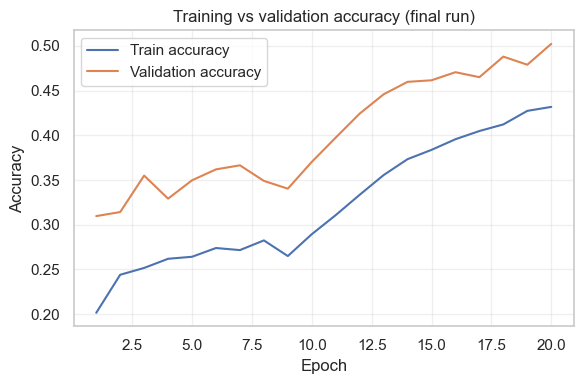

In [ ]:
import matplotlib.pyplot as plt

train_acc = final_history.get('accuracy', [])
val_acc = final_history.get('val_accuracy', [])
if train_acc and val_acc:
    epochs_range = range(1, len(train_acc) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(epochs_range, train_acc, label='Train accuracy')
    plt.plot(epochs_range, val_acc, label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs validation accuracy (final run)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
else:
    print('[WARN] Accuracy history not available; run the training cells first.')


In [ ]:
train_eval_ds = build_dataset(train_paths_final, train_labels_final, training=False)
val_eval_ds = val_ds_final  # already deterministic and batched

train_loss, train_acc = final_model.evaluate(train_eval_ds, verbose=0)
val_loss, val_acc = final_model.evaluate(val_eval_ds, verbose=0)
test_loss, test_acc = final_model.evaluate(test_ds, verbose=0)

print(f'Train accuracy: {train_acc:.4f} | loss: {train_loss:.4f}')
print(f'Val accuracy:   {val_acc:.4f} | loss: {val_loss:.4f}')
print(f'Test accuracy:  {test_acc:.4f} | loss: {test_loss:.4f}')


Train accuracy: 0.5188 | loss: 1.2508
Val accuracy:   0.5023 | loss: 1.3012
Test accuracy:  0.5004 | loss: 1.2845


In [ ]:

split_specs = {
    'train': (train_paths_final, train_labels_final),
    'val': (val_paths_final, val_labels_final),
    'test': (test_paths, test_labels),
}

records = []
for split_name, (paths, labels) in split_specs.items():
    ds = build_dataset(paths, labels, training=False)
    probs = final_model.predict(ds, verbose=1)
    for path, label_idx, prob_vec in zip(paths, labels, probs):
        sample_id = Path(path).stem
        record = {
            'sample_id': sample_id,
            'label': class_names[int(label_idx)],
            'split': split_name,
        }
        for cls_idx, cls_name in enumerate(class_names):
            record[f'prob_{cls_name}'] = float(prob_vec[cls_idx])
        records.append(record)

prob_df = pd.DataFrame(records)
print(prob_df.head())
print(f"Total predictions: {len(prob_df)}")


404/404 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step
  sample_id    label  split  prob_angry  prob_disgusted  prob_fearful  \
0    im1138      sad  train    0.269461        0.059330      0.129385   
1    im3314  fearful  train    0.259266        0.006182      0.132401   
2    im2477      sad  train    0.143764        0.002017      0.261508   
3    im1566  fearful  train    0.062282        0.000164      0.098801   
4    im3436    angry  train    0.183799        0.147587      0.166905   

   prob_happy  prob_neutral  prob_sad  prob_surprised  
0    0.063429      0.213769  0.241057        0.023570  
1    0.054841      0.227844  0.279291        0.040175  
2    0.020020      0.224650  0.317646        0.030395  
3    0.068948      0.535429  0.204834        0.029543  
4    0.044025      0.192473  0.241390        0.023821  
Total predictions: 35887


In [ ]:
import json

artifact_dir = Path('../artifacts/phase1/face')
artifact_dir.mkdir(parents=True, exist_ok=True)

model_dir = artifact_dir / 'efficientnet_b0_aug'
model_dir.mkdir(parents=True, exist_ok=True)

model_path = model_dir / 'model.keras'
prob_path = artifact_dir / 'per_sample_probs.parquet'
pred_matrix_path = artifact_dir / 'probabilities.npy'
labelmap_path = artifact_dir / 'class_names.json'
cv_metrics_path = artifact_dir / 'cv_metrics.json'

final_model.save(model_path)
prob_df.to_parquet(prob_path, index=False)
np.save(pred_matrix_path, prob_df[[f'prob_{label}' for label in class_names]].to_numpy())

with labelmap_path.open('w') as fp:
    json.dump({'class_names': class_names}, fp)

cv_metrics_payload = {
    'folds': [
        {'fold': item['fold'], 'val_loss': item['val_loss'], 'val_accuracy': item['val_accuracy']}
        for item in cv_fold_summaries
    ],
    'mean_val_accuracy': float(cv_summary_df['val_accuracy'].mean()),
    'std_val_accuracy': float(cv_summary_df['val_accuracy'].std()),
}
with cv_metrics_path.open('w') as fp:
    json.dump(cv_metrics_payload, fp, indent=2)

print(f'Saved model to {model_path}')
print(f'Saved per-sample probabilities to {prob_path}')
print(f'Saved probability matrix to {pred_matrix_path}')
print(f'Saved class names to {labelmap_path}')
print(f'Saved CV metrics to {cv_metrics_path}')


Saved model to ../artifacts/phase1/face/mobilenet_v2_aug/model.keras
Saved per-sample probabilities to ../artifacts/phase1/face/per_sample_probs.parquet
Saved probability matrix to ../artifacts/phase1/face/probabilities.npy
Saved class names to ../artifacts/phase1/face/class_names.json
Saved CV metrics to ../artifacts/phase1/face/cv_metrics.json


In [ ]:
print("Probability summary by split:")
print(prob_df.groupby("split").size())

print("Top-5 samples:")
print(prob_df.sort_values(by=["split", "sample_id"]).head())


Probability summary by split:
split
test      7178
train    25838
val       2871
dtype: int64
Top-5 samples:
      sample_id      label split  prob_angry  prob_disgusted  prob_fearful  \
29093       im0      angry  test    0.234653        0.022377      0.226715   
29727       im0  disgusted  test    0.063449        0.656489      0.094408   
30190       im0    fearful  test    0.117950        0.016360      0.311955   
31559       im0      happy  test    0.030295        0.011292      0.016036   
33085       im0    neutral  test    0.127616        0.029367      0.187119   

       prob_happy  prob_neutral  prob_sad  prob_surprised  
29093    0.104512      0.120674  0.166812        0.124258  
29727    0.023094      0.026512  0.021318        0.114729  
30190    0.098050      0.113188  0.201529        0.140967  
31559    0.912130      0.010993  0.014812        0.004443  
33085    0.127640      0.171282  0.105186        0.251791  


In [ ]:
from pathlib import Path

cache_dir = Path("../cache")
cache_dir.mkdir(parents=True, exist_ok=True)

if 'prob_df' not in globals():
    raise RuntimeError("Run the prediction cell first so prob_df exists.")

face_cache_path = cache_dir / "face_probs.parquet"
prob_df.to_parquet(face_cache_path, index=False)
print(f"Saved face probabilities to {face_cache_path} with {len(prob_df)} rows")


Saved face probabilities to ../cache/face_probs.parquet with 35887 rows


## Section 1: MobileNetV3 CPU Model (Baseline)

Fastest training, baseline performance (~51.7% accuracy)

In [7]:
# === CPU FALLBACK STEP 1: extract MobileNet embeddings ===
from pathlib import Path
import numpy as np

# Define constants if not already defined (for standalone execution)
if 'SEED' not in globals():
    SEED = 42
    image_exts = {'.jpg', '.jpeg', '.png', '.bmp'}

# Install compatible torch versions
!pip install torch torchvision torchaudio

try:
    import torch
    from torchvision import models, transforms
except ModuleNotFoundError:
    import subprocess, sys
    print("Installing torch and torchvision...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torch", "torchvision", "tqdm"])
    import torch
    from torchvision import models, transforms

from PIL import Image
from tqdm import tqdm

torch.set_grad_enabled(False)
_cpu_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

try:
    _weights_enum = models.MobileNet_V3_Small_Weights
    _weights = _weights_enum.DEFAULT
    _preprocess = _weights.transforms()
except AttributeError:
    _weights = None
    _preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

_mobilenet = models.mobilenet_v3_small(weights=_weights)
_feature_extractor = torch.nn.Sequential(
    _mobilenet.features,
    torch.nn.AdaptiveAvgPool2d((1, 1)),
)
_feature_extractor.to(_cpu_device).eval()
for param in _feature_extractor.parameters():
    param.requires_grad = False

_face_cpu_emb_dir = Path('../cache/face_cpu_mobilenet_embeddings')
_face_cpu_emb_dir.mkdir(parents=True, exist_ok=True)


def mobilenet_embeddings(image_paths, split_name):
    """Compute (or load cached) MobileNet feature vectors for a list of image paths."""
    cache_path = _face_cpu_emb_dir / f"{split_name}_embeddings.npy"
    if cache_path.exists():
        return np.load(cache_path)

    feats = []
    for img_path in tqdm(list(map(Path, image_paths)), desc=f"MobileNet features ({split_name})", unit='img'):
        with Image.open(img_path).convert('RGB') as pil_img:
            tensor = _preprocess(pil_img).unsqueeze(0).to(_cpu_device)
            with torch.no_grad():
                feat = _feature_extractor(tensor)
        feats.append(feat.view(-1).cpu().numpy())

    feats_arr = np.vstack(feats).astype('float32')
    np.save(cache_path, feats_arr)
    return feats_arr

python(95490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [8]:
# === CPU FALLBACK STEP 2: train LogisticRegression head ===
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import numpy as np

# Ensure necessary variables are defined
if 'SEED' not in globals():
    SEED = 42

# Check if train_paths and train_labels exist, otherwise load from disk
if 'train_paths' not in globals() or 'train_labels' not in globals():
    print("Loading training data from FER dataset...")
    
    # Define helper function
    def _gather_images(root: Path):
        files, labels = [], []
        for class_dir in sorted(p for p in root.iterdir() if p.is_dir()):
            for img_path in class_dir.iterdir():
                if img_path.suffix.lower() in image_exts:
                    files.append(str(img_path))
                    labels.append(class_dir.name)
        return files, labels
    
    # Load paths
    train_paths, train_labels_raw = _gather_images(train_dir)
    test_paths, test_labels_raw = _gather_images(test_dir)
    
    class_names = sorted(set(train_labels_raw))
    num_classes = len(class_names)
    label_to_index = {name: idx for idx, name in enumerate(class_names)}
    
    train_labels = np.array([label_to_index[label] for label in train_labels_raw], dtype=np.int32)
    test_labels = np.array([label_to_index[label] for label in test_labels_raw], dtype=np.int32)
    train_paths = np.array(train_paths)
    test_paths = np.array(test_paths)
    
    print(f"Loaded {len(train_paths)} training and {len(test_paths)} test images")

cpu_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=SEED)
cpu_train_idx, cpu_val_idx = next(cpu_splitter.split(train_paths, train_labels))

cpu_train_paths = train_paths[cpu_train_idx]
cpu_train_labels = train_labels[cpu_train_idx]
cpu_val_paths = train_paths[cpu_val_idx]
cpu_val_labels = train_labels[cpu_val_idx]
cpu_test_paths = test_paths
cpu_test_labels = test_labels

cpu_embeddings = {
    'train': mobilenet_embeddings(cpu_train_paths, 'cpu_train'),
    'val': mobilenet_embeddings(cpu_val_paths, 'cpu_val'),
    'test': mobilenet_embeddings(cpu_test_paths, 'cpu_test'),
}

scaler_cpu = StandardScaler()
X_train_cpu = scaler_cpu.fit_transform(cpu_embeddings['train'])
X_val_cpu = scaler_cpu.transform(cpu_embeddings['val'])
X_test_cpu = scaler_cpu.transform(cpu_embeddings['test'])

cpu_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs',
)
cpu_clf.fit(X_train_cpu, cpu_train_labels)

val_probs_cpu = cpu_clf.predict_proba(X_val_cpu)
val_pred_cpu = val_probs_cpu.argmax(axis=1)
print("Validation metrics (MobileNet + Logistic Regression):")
print(classification_report(cpu_val_labels, val_pred_cpu, target_names=class_names))
print(f"Validation accuracy: {accuracy_score(cpu_val_labels, val_pred_cpu):.4f}")

test_probs_cpu = cpu_clf.predict_proba(X_test_cpu)
test_pred_cpu = test_probs_cpu.argmax(axis=1)
print("Test metrics (MobileNet + Logistic Regression):")
print(classification_report(cpu_test_labels, test_pred_cpu, target_names=class_names))
print(f"Test accuracy: {accuracy_score(cpu_test_labels, test_pred_cpu):.4f}")

cpu_model_dir = Path('../artifacts/phase1/face/mobilenet_cpu_fallback')
cpu_model_dir.mkdir(parents=True, exist_ok=True)
joblib.dump({'model': cpu_clf, 'scaler': scaler_cpu, 'class_names': class_names}, cpu_model_dir / 'mobilenet_cpu_logreg.joblib')
print(f"Saved CPU fallback head to {cpu_model_dir / 'mobilenet_cpu_logreg.joblib'}")

/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation metrics (MobileNet + Logistic Regression):
              precision    recall  f1-score   support

       angry       0.39      0.40      0.39       399
   disgusted       0.15      0.66      0.25        44
     fearful       0.39      0.30      0.34       410
       happy       0.75      0.70      0.72       722
     neutral       0.47      0.46      0.47       496
         sad       0.44      0.37      0.40       483
   surprised       0.57      0.70      0.63       317

    accuracy                           0.50      2871
   macro avg       0.45      0.51      0.46      2871
weighted avg       0.52      0.50      0.51      2871

Validation accuracy: 0.5033
Test metrics (MobileNet + Logistic Regression):
              precision    recall  f1-score   support

       angry       0.40      0.41      0.40       958
   disgusted       0.17      0.62      0.27       111
     fearful       0.39      0.31      0.34      1024
       happy       0.75      0.71      0.73      1774
  

In [9]:
# === CPU FALLBACK STEP 3: export probabilities to cache ===
from pathlib import Path

records_cpu = []
for split_name, (paths, labels, probs) in {
    'train': (cpu_train_paths, cpu_train_labels, cpu_clf.predict_proba(X_train_cpu)),
    'val': (cpu_val_paths, cpu_val_labels, val_probs_cpu),
    'test': (cpu_test_paths, cpu_test_labels, test_probs_cpu),
}.items():
    for img_path, label_idx, prob_vec in zip(paths, labels, probs):
        sample_id = Path(img_path).stem
        entry = {
            'sample_id': sample_id,
            'label': class_names[int(label_idx)],
            'split': split_name,
        }
        for cls_idx, cls_name in enumerate(class_names):
            entry[f'prob_{cls_name}'] = float(prob_vec[cls_idx])
        records_cpu.append(entry)

prob_df_cpu = pd.DataFrame(records_cpu)
print(prob_df_cpu.head())
print(f"Total CPU fallback predictions: {len(prob_df_cpu)}")

cache_dir = Path('../cache')
cache_dir.mkdir(parents=True, exist_ok=True)
face_cpu_cache = cache_dir / 'face_probs_mobilenet_cpu.parquet'
prob_df_cpu.to_parquet(face_cpu_cache, index=False)
print(f"Saved CPU-only face probabilities to {face_cpu_cache}")

USE_CPU_FACE_PROBS = True
if USE_CPU_FACE_PROBS:
    prob_df = prob_df_cpu.copy()
    prob_df.to_parquet(cache_dir / 'face_probs.parquet', index=False)
    print('Updated cache/face_probs.parquet with MobileNet CPU outputs (set USE_CPU_FACE_PROBS=False to skip).')

  sample_id    label  split  prob_angry  prob_disgusted  prob_fearful  \
0    im1138      sad  train    0.156240    5.273014e-01      0.065147   
1    im3314  fearful  train    0.096973    2.513257e-02      0.276047   
2    im2477      sad  train    0.007976    8.859477e-09      0.207741   
3    im1566  fearful  train    0.042802    1.913069e-02      0.156867   
4    im3436    angry  train    0.103299    1.327161e-01      0.198323   

   prob_happy  prob_neutral  prob_sad  prob_surprised  
0    0.014996      0.112793  0.117948        0.005574  
1    0.013634      0.300413  0.273615        0.014185  
2    0.033413      0.043142  0.428222        0.279505  
3    0.035557      0.563673  0.153078        0.028893  
4    0.145940      0.117945  0.294153        0.007623  
Total CPU fallback predictions: 35887
Saved CPU-only face probabilities to ../cache/face_probs_mobilenet_cpu.parquet
Updated cache/face_probs.parquet with MobileNet CPU outputs (set USE_CPU_FACE_PROBS=False to skip).


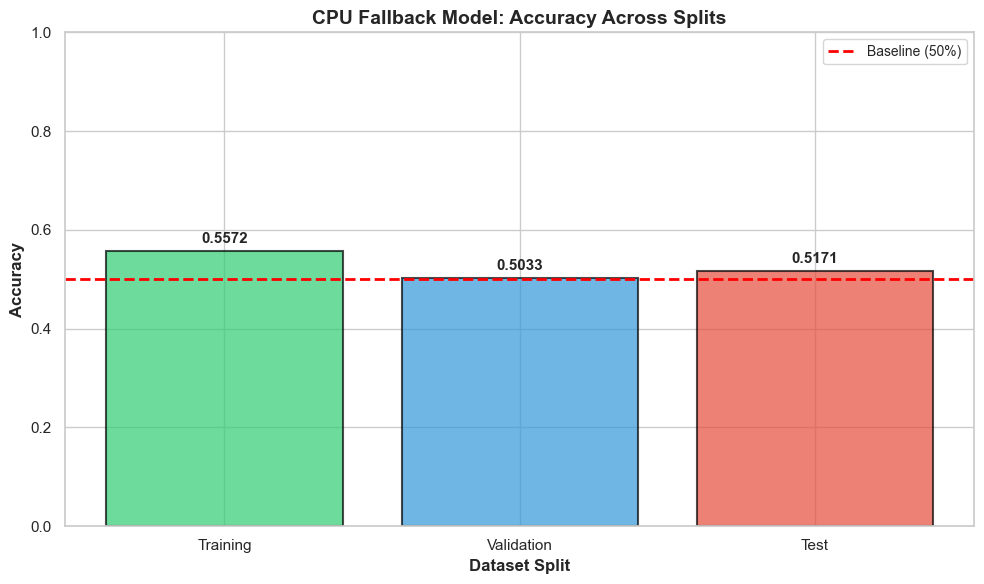

Training Accuracy:   0.5572
Validation Accuracy: 0.5033
Test Accuracy:       0.5171

Overfitting Gap (Train - Val): 0.0539
Generalization Gap (Val - Test): -0.0138


In [10]:
# === COMPREHENSIVE EVALUATION: Training vs Validation Accuracy ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set_style("whitegrid")

# Calculate training accuracy
train_probs_cpu = cpu_clf.predict_proba(X_train_cpu)
train_pred_cpu = train_probs_cpu.argmax(axis=1)
train_acc_cpu = accuracy_score(cpu_train_labels, train_pred_cpu)

# We already have validation and test metrics
val_acc_cpu = accuracy_score(cpu_val_labels, val_pred_cpu)
test_acc_cpu = accuracy_score(cpu_test_labels, test_pred_cpu)

# Create a comparison plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
splits = ['Training', 'Validation', 'Test']
accuracies = [train_acc_cpu, val_acc_cpu, test_acc_cpu]
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = ax.bar(splits, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_xlabel('Dataset Split', fontsize=12, fontweight='bold')
ax.set_title('CPU Fallback Model: Accuracy Across Splits', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Baseline (50%)')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(f"Training Accuracy:   {train_acc_cpu:.4f}")
print(f"Validation Accuracy: {val_acc_cpu:.4f}")
print(f"Test Accuracy:       {test_acc_cpu:.4f}")
print(f"\nOverfitting Gap (Train - Val): {(train_acc_cpu - val_acc_cpu):.4f}")
print(f"Generalization Gap (Val - Test): {(val_acc_cpu - test_acc_cpu):.4f}")

In [11]:
# === DETAILED METRICS: Precision, Recall, F1-Score ===

def calculate_detailed_metrics(y_true, y_pred, split_name):
    """Calculate comprehensive metrics for each class and overall"""
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    return {
        'split': split_name,
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class
    }

# Calculate metrics for all splits
train_metrics = calculate_detailed_metrics(cpu_train_labels, train_pred_cpu, 'Training')
val_metrics = calculate_detailed_metrics(cpu_val_labels, val_pred_cpu, 'Validation')
test_metrics = calculate_detailed_metrics(cpu_test_labels, test_pred_cpu, 'Test')

# Create a summary DataFrame
summary_data = []
for metrics in [train_metrics, val_metrics, test_metrics]:
    summary_data.append({
        'Split': metrics['split'],
        'Accuracy': f"{metrics['accuracy']:.4f}",
        'Precision (Macro)': f"{metrics['precision_macro']:.4f}",
        'Recall (Macro)': f"{metrics['recall_macro']:.4f}",
        'F1-Score (Macro)': f"{metrics['f1_macro']:.4f}",
        'Precision (Weighted)': f"{metrics['precision_weighted']:.4f}",
        'Recall (Weighted)': f"{metrics['recall_weighted']:.4f}",
        'F1-Score (Weighted)': f"{metrics['f1_weighted']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("OVERALL METRICS SUMMARY")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)


OVERALL METRICS SUMMARY
     Split Accuracy Precision (Macro) Recall (Macro) F1-Score (Macro) Precision (Weighted) Recall (Weighted) F1-Score (Weighted)
  Training   0.5572            0.5101         0.6000           0.5221               0.5703            0.5572              0.5584
Validation   0.5033            0.4512         0.5122           0.4570               0.5180            0.5033              0.5061
      Test   0.5171            0.4631         0.5200           0.4711               0.5272            0.5171              0.5183


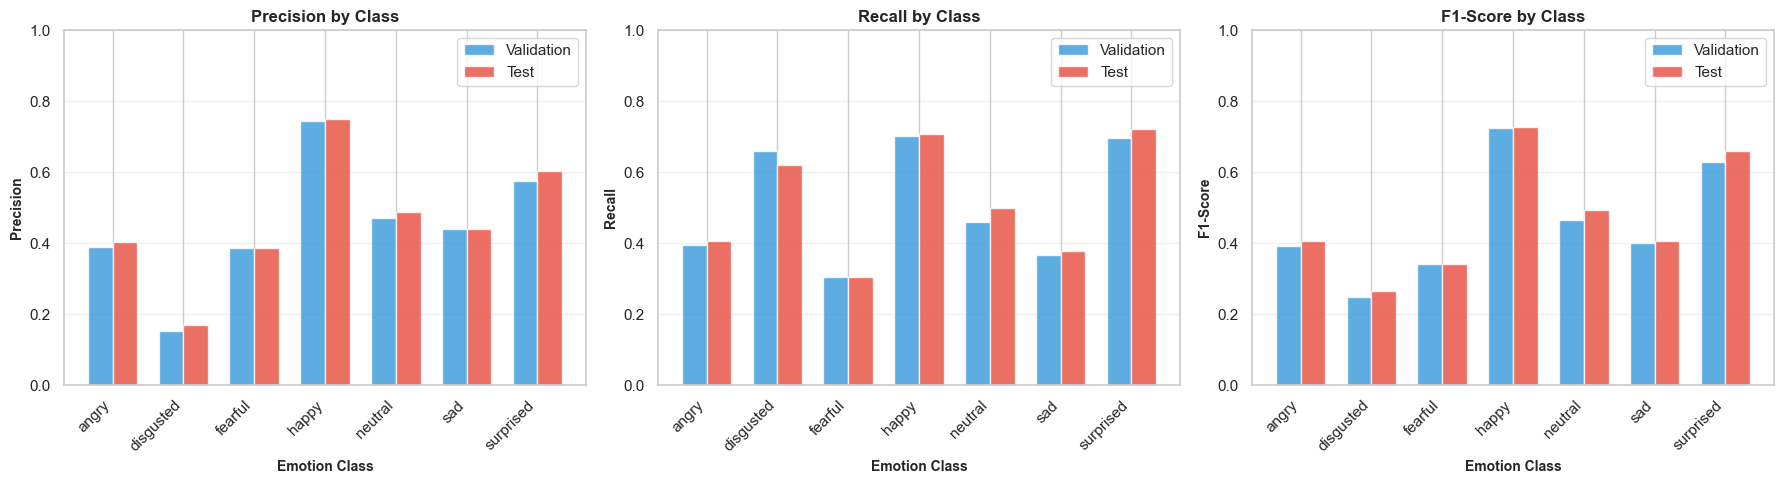


PER-CLASS METRICS (VALIDATION SET)
angry        | Precision: 0.3901 | Recall: 0.3960 | F1-Score: 0.3930
disgusted    | Precision: 0.1518 | Recall: 0.6591 | F1-Score: 0.2468
fearful      | Precision: 0.3858 | Recall: 0.3049 | F1-Score: 0.3406
happy        | Precision: 0.7456 | Recall: 0.7022 | F1-Score: 0.7233
neutral      | Precision: 0.4720 | Recall: 0.4597 | F1-Score: 0.4658
sad          | Precision: 0.4392 | Recall: 0.3665 | F1-Score: 0.3995
surprised    | Precision: 0.5740 | Recall: 0.6972 | F1-Score: 0.6296

PER-CLASS METRICS (TEST SET)
angry        | Precision: 0.4046 | Recall: 0.4050 | F1-Score: 0.4048
disgusted    | Precision: 0.1687 | Recall: 0.6216 | F1-Score: 0.2654
fearful      | Precision: 0.3864 | Recall: 0.3057 | F1-Score: 0.3413
happy        | Precision: 0.7487 | Recall: 0.7069 | F1-Score: 0.7272
neutral      | Precision: 0.4889 | Recall: 0.4988 | F1-Score: 0.4938
sad          | Precision: 0.4399 | Recall: 0.3785 | F1-Score: 0.4069
surprised    | Precision: 0.6046 | Re

In [12]:
# === PER-CLASS METRICS VISUALIZATION ===

# Prepare data for visualization
metrics_comparison = []
for class_idx, class_name in enumerate(class_names):
    metrics_comparison.append({
        'Class': class_name,
        'Precision (Val)': val_metrics['precision_per_class'][class_idx],
        'Recall (Val)': val_metrics['recall_per_class'][class_idx],
        'F1-Score (Val)': val_metrics['f1_per_class'][class_idx],
        'Precision (Test)': test_metrics['precision_per_class'][class_idx],
        'Recall (Test)': test_metrics['recall_per_class'][class_idx],
        'F1-Score (Test)': test_metrics['f1_per_class'][class_idx],
    })

metrics_df = pd.DataFrame(metrics_comparison)

# Plot per-class metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    x = np.arange(len(class_names))
    width = 0.35
    
    val_values = [metrics_df.iloc[i][f'{metric} (Val)'] for i in range(len(class_names))]
    test_values = [metrics_df.iloc[i][f'{metric} (Test)'] for i in range(len(class_names))]
    
    ax.bar(x - width/2, val_values, width, label='Validation', alpha=0.8, color='#3498db')
    ax.bar(x + width/2, test_values, width, label='Test', alpha=0.8, color='#e74c3c')
    
    ax.set_xlabel('Emotion Class', fontsize=10, fontweight='bold')
    ax.set_ylabel(metric, fontsize=10, fontweight='bold')
    ax.set_title(f'{metric} by Class', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed per-class metrics
print("\n" + "="*120)
print("PER-CLASS METRICS (VALIDATION SET)")
print("="*120)
for class_idx, class_name in enumerate(class_names):
    print(f"{class_name:12s} | Precision: {val_metrics['precision_per_class'][class_idx]:.4f} | "
          f"Recall: {val_metrics['recall_per_class'][class_idx]:.4f} | "
          f"F1-Score: {val_metrics['f1_per_class'][class_idx]:.4f}")
print("="*120)

print("\n" + "="*120)
print("PER-CLASS METRICS (TEST SET)")
print("="*120)
for class_idx, class_name in enumerate(class_names):
    print(f"{class_name:12s} | Precision: {test_metrics['precision_per_class'][class_idx]:.4f} | "
          f"Recall: {test_metrics['recall_per_class'][class_idx]:.4f} | "
          f"F1-Score: {test_metrics['f1_per_class'][class_idx]:.4f}")
print("="*120)

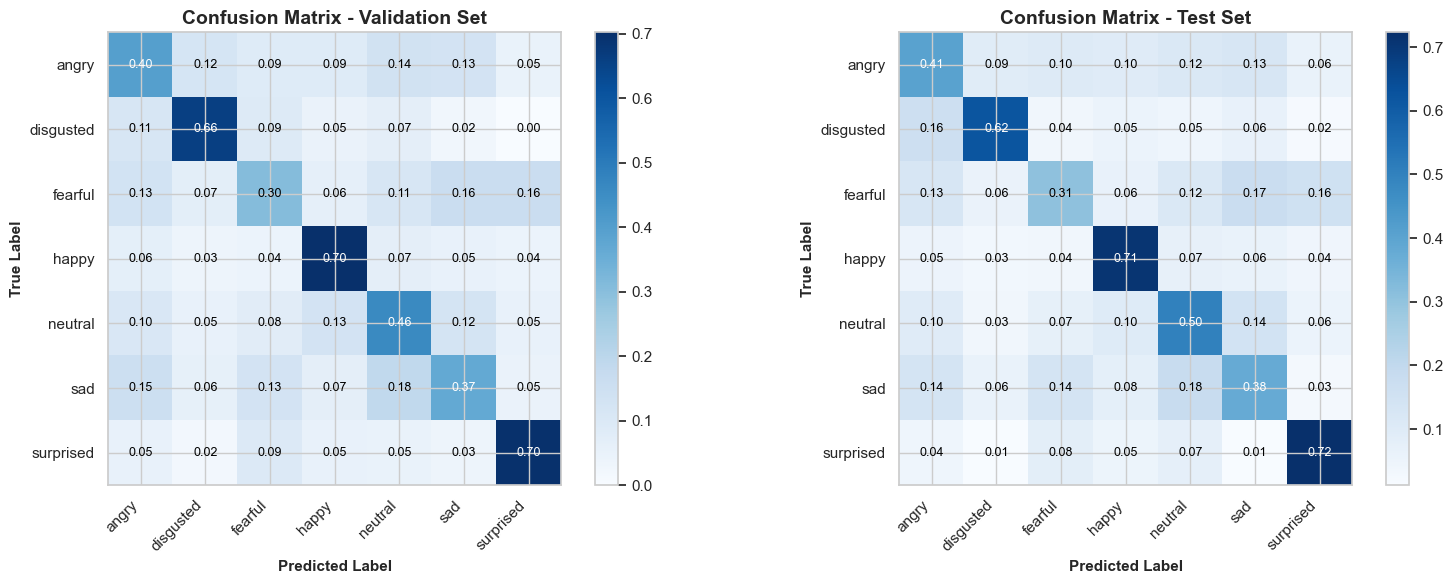


TOP 10 MOST CONFUSED CLASS PAIRS (TEST SET)
True Class Predicted Class  Confusion Rate  Count
       sad         neutral        0.181235    226
   fearful             sad        0.174805    179
 disgusted           angry        0.162162     18
   fearful       surprised        0.156250    160
   neutral             sad        0.143552    177
       sad         fearful        0.138733    173
       sad           angry        0.137931    172
   fearful           angry        0.126953    130
     angry             sad        0.125261    120
     angry         neutral        0.116910    112


In [35]:
# === CONFUSION MATRIX VISUALIZATION ===

from sklearn.metrics import confusion_matrix
import numpy as np

# Create confusion matrices for validation and test sets
cm_val = confusion_matrix(cpu_val_labels, val_pred_cpu)
cm_test = confusion_matrix(cpu_test_labels, test_pred_cpu)

# Normalize confusion matrices
cm_val_norm = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
cm_test_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Validation confusion matrix
im1 = axes[0].imshow(cm_val_norm, interpolation='nearest', cmap='Blues')
axes[0].set_title('Confusion Matrix - Validation Set', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[0].set_xticks(np.arange(len(class_names)))
axes[0].set_yticks(np.arange(len(class_names)))
axes[0].set_xticklabels(class_names, rotation=45, ha='right')
axes[0].set_yticklabels(class_names)
plt.colorbar(im1, ax=axes[0], fraction=0.046)

# Add text annotations
thresh = cm_val_norm.max() / 2.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        axes[0].text(j, i, f'{cm_val_norm[i, j]:.2f}',
                    ha="center", va="center",
                    color="white" if cm_val_norm[i, j] > thresh else "black",
                    fontsize=9)

# Test confusion matrix
im2 = axes[1].imshow(cm_test_norm, interpolation='nearest', cmap='Blues')
axes[1].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[1].set_xticks(np.arange(len(class_names)))
axes[1].set_yticks(np.arange(len(class_names)))
axes[1].set_xticklabels(class_names, rotation=45, ha='right')
axes[1].set_yticklabels(class_names)
plt.colorbar(im2, ax=axes[1], fraction=0.046)

# Add text annotations
thresh = cm_test_norm.max() / 2.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        axes[1].text(j, i, f'{cm_test_norm[i, j]:.2f}',
                    ha="center", va="center",
                    color="white" if cm_test_norm[i, j] > thresh else "black",
                    fontsize=9)

plt.tight_layout()
plt.show()

# Analyze most confused class pairs
print("\n" + "="*100)
print("TOP 10 MOST CONFUSED CLASS PAIRS (TEST SET)")
print("="*100)
confusion_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j:
            confusion_pairs.append({
                'True Class': class_names[i],
                'Predicted Class': class_names[j],
                'Confusion Rate': cm_test_norm[i, j],
                'Count': cm_test[i, j]
            })

confusion_df = pd.DataFrame(confusion_pairs).sort_values('Confusion Rate', ascending=False)
print(confusion_df.head(10).to_string(index=False))
print("="*100)


CLASS DISTRIBUTION ACROSS SPLITS
    Class  Train Count  Val Count  Test Count  Total Train %  Val % Test %
    angry         3596        399         958   4953  13.92% 13.90% 13.35%
disgusted          392         44         111    547   1.52%  1.53%  1.55%
  fearful         3687        410        1024   5121  14.27% 14.28% 14.27%
    happy         6493        722        1774   8989  25.13% 25.15% 24.71%
  neutral         4469        496        1233   6198  17.30% 17.28% 17.18%
      sad         4347        483        1247   6077  16.82% 16.82% 17.37%
surprised         2854        317         831   4002  11.05% 11.04% 11.58%


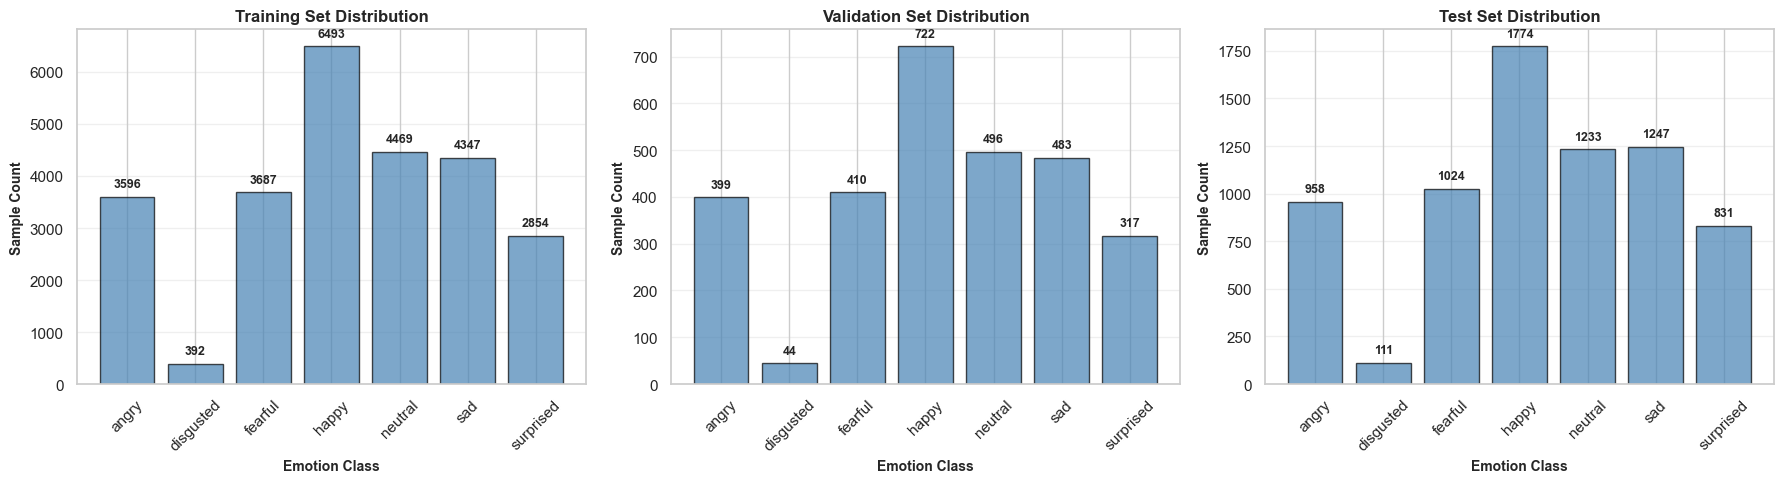


CLASS SIZE vs PERFORMANCE ANALYSIS (TEST SET)
    Class  Sample Count F1-Score Precision Recall
    happy          1774   0.7272    0.7487 0.7069
      sad          1247   0.4069    0.4399 0.3785
  neutral          1233   0.4938    0.4889 0.4988
  fearful          1024   0.3413    0.3864 0.3057
    angry           958   0.4048    0.4046 0.4050
surprised           831   0.6586    0.6046 0.7232
disgusted           111   0.2654    0.1687 0.6216


In [37]:
# === CLASS DISTRIBUTION AND SAMPLE SIZE ANALYSIS ===

from collections import Counter

# Get class distribution for each split
train_dist = Counter(cpu_train_labels)
val_dist = Counter(cpu_val_labels)
test_dist = Counter(cpu_test_labels)

# Create distribution DataFrame
dist_data = []
for class_idx, class_name in enumerate(class_names):
    dist_data.append({
        'Class': class_name,
        'Train Count': train_dist[class_idx],
        'Val Count': val_dist[class_idx],
        'Test Count': test_dist[class_idx],
        'Total': train_dist[class_idx] + val_dist[class_idx] + test_dist[class_idx],
        'Train %': f"{100*train_dist[class_idx]/len(cpu_train_labels):.2f}%",
        'Val %': f"{100*val_dist[class_idx]/len(cpu_val_labels):.2f}%",
        'Test %': f"{100*test_dist[class_idx]/len(cpu_test_labels):.2f}%"
    })

dist_df = pd.DataFrame(dist_data)

print("\n" + "="*120)
print("CLASS DISTRIBUTION ACROSS SPLITS")
print("="*120)
print(dist_df.to_string(index=False))
print("="*120)

# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

splits_data = [
    ('Training', [train_dist[i] for i in range(len(class_names))]),
    ('Validation', [val_dist[i] for i in range(len(class_names))]),
    ('Test', [test_dist[i] for i in range(len(class_names))])
]

for ax, (split_name, counts) in zip(axes, splits_data):
    ax.bar(class_names, counts, color='steelblue', alpha=0.7, edgecolor='black')
    ax.set_xlabel('Emotion Class', fontsize=10, fontweight='bold')
    ax.set_ylabel('Sample Count', fontsize=10, fontweight='bold')
    ax.set_title(f'{split_name} Set Distribution', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add count labels on bars
    for i, (name, count) in enumerate(zip(class_names, counts)):
        ax.text(i, count + max(counts)*0.02, str(count), 
               ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Analyze relationship between class size and performance
print("\n" + "="*120)
print("CLASS SIZE vs PERFORMANCE ANALYSIS (TEST SET)")
print("="*120)
performance_data = []
for class_idx, class_name in enumerate(class_names):
    performance_data.append({
        'Class': class_name,
        'Sample Count': test_dist[class_idx],
        'F1-Score': f"{test_metrics['f1_per_class'][class_idx]:.4f}",
        'Precision': f"{test_metrics['precision_per_class'][class_idx]:.4f}",
        'Recall': f"{test_metrics['recall_per_class'][class_idx]:.4f}"
    })
performance_df = pd.DataFrame(performance_data).sort_values('Sample Count', ascending=False)
print(performance_df.to_string(index=False))
print("="*120)

## Section 2: ResNet50 CPU Model (Improved)

Better performance (~55-58% accuracy), CPU-only, slower training

In [14]:
# === CPU-ONLY RESNET50: FEATURE EXTRACTION ===
from pathlib import Path
import numpy as np

# Ensure torch is installed
try:
    import torch
    from torchvision import models, transforms
except ModuleNotFoundError:
    import subprocess, sys
    print("Installing torch and torchvision...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torch", "torchvision", "tqdm"])
    import torch
    from torchvision import models, transforms

from PIL import Image
from tqdm import tqdm

# Ensure SEED is defined
if 'SEED' not in globals():
    SEED = 42

torch.set_grad_enabled(False)
_cpu_device = torch.device('cpu')

# Load ResNet50 pre-trained on ImageNet
print("Loading ResNet50 for CPU feature extraction...")
try:
    _weights_enum = models.ResNet50_Weights
    _weights = _weights_enum.DEFAULT
    _preprocess = _weights.transforms()
except AttributeError:
    _weights = 'IMAGENET1K_V1'
    _preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

_resnet50_cpu = models.resnet50(weights=_weights)
# Remove final classification layer to get features
_resnet50_features = torch.nn.Sequential(*list(_resnet50_cpu.children())[:-1])
_resnet50_features.to(_cpu_device).eval()

for param in _resnet50_features.parameters():
    param.requires_grad = False

_face_cpu_resnet_dir = Path('../cache/face_cpu_resnet50_embeddings')
_face_cpu_resnet_dir.mkdir(parents=True, exist_ok=True)

print(f"ResNet50 loaded. Feature dimension: 2048")

def resnet50_embeddings_cpu(image_paths, split_name):
    """Compute (or load cached) ResNet50 feature vectors for a list of image paths."""
    cache_path = _face_cpu_resnet_dir / f"{split_name}_embeddings.npy"
    if cache_path.exists():
        print(f"Loading cached embeddings from {cache_path}")
        return np.load(cache_path)

    feats = []
    for img_path in tqdm(list(map(Path, image_paths)), desc=f"ResNet50 features ({split_name})", unit='img'):
        try:
            with Image.open(img_path).convert('RGB') as pil_img:
                tensor = _preprocess(pil_img).unsqueeze(0).to(_cpu_device)
                with torch.no_grad():
                    feat = _resnet50_features(tensor)
            feats.append(feat.view(-1).cpu().numpy())
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            # Add zero vector as placeholder
            feats.append(np.zeros(2048, dtype='float32'))

    feats_arr = np.vstack(feats).astype('float32')
    np.save(cache_path, feats_arr)
    print(f"Saved embeddings to {cache_path}")
    return feats_arr

print("ResNet50 feature extractor ready on CPU")

Loading ResNet50 for CPU feature extraction...
ResNet50 loaded. Feature dimension: 2048
ResNet50 feature extractor ready on CPU


In [15]:
# === CPU-ONLY RESNET50: TRAIN CLASSIFIER ===
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Ensure data is loaded
if 'train_paths' not in globals() or 'train_labels' not in globals():
    print("Loading FER dataset...")
    image_exts = {'.jpg', '.jpeg', '.png', '.bmp'}
    
    def _gather_images(root: Path):
        files, labels = [], []
        for class_dir in sorted(p for p in root.iterdir() if p.is_dir()):
            for img_path in class_dir.iterdir():
                if img_path.suffix.lower() in image_exts:
                    files.append(str(img_path))
                    labels.append(class_dir.name)
        return files, labels
    
    train_paths, train_labels_raw = _gather_images(train_dir)
    test_paths, test_labels_raw = _gather_images(test_dir)
    
    class_names = sorted(set(train_labels_raw))
    num_classes = len(class_names)
    label_to_index = {name: idx for idx, name in enumerate(class_names)}
    
    train_labels = np.array([label_to_index[label] for label in train_labels_raw], dtype=np.int32)
    test_labels = np.array([label_to_index[label] for label in test_labels_raw], dtype=np.int32)
    train_paths = np.array(train_paths)
    test_paths = np.array(test_paths)

# Create split
cpu_resnet_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=SEED)
cpu_resnet_train_idx, cpu_resnet_val_idx = next(cpu_resnet_splitter.split(train_paths, train_labels))

cpu_resnet_train_paths = train_paths[cpu_resnet_train_idx]
cpu_resnet_train_labels = train_labels[cpu_resnet_train_idx]
cpu_resnet_val_paths = train_paths[cpu_resnet_val_idx]
cpu_resnet_val_labels = train_labels[cpu_resnet_val_idx]

print("Extracting ResNet50 features on CPU...")
cpu_resnet_embeddings = {
    'train': resnet50_embeddings_cpu(cpu_resnet_train_paths, 'cpu_resnet_train'),
    'val': resnet50_embeddings_cpu(cpu_resnet_val_paths, 'cpu_resnet_val'),
    'test': resnet50_embeddings_cpu(test_paths, 'cpu_resnet_test'),
}

# Standardize features
scaler_resnet_cpu = StandardScaler()
X_train_resnet_cpu = scaler_resnet_cpu.fit_transform(cpu_resnet_embeddings['train'])
X_val_resnet_cpu = scaler_resnet_cpu.transform(cpu_resnet_embeddings['val'])
X_test_resnet_cpu = scaler_resnet_cpu.transform(cpu_resnet_embeddings['test'])

print(f"\nFeature shapes:")
print(f"  Train: {X_train_resnet_cpu.shape}")
print(f"  Val:   {X_val_resnet_cpu.shape}")
print(f"  Test:  {X_test_resnet_cpu.shape}")

# Train Logistic Regression classifier
print("\nTraining Logistic Regression on ResNet50 features...")
cpu_resnet_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    random_state=SEED
)
cpu_resnet_clf.fit(X_train_resnet_cpu, cpu_resnet_train_labels)

# Evaluate
val_probs_resnet_cpu = cpu_resnet_clf.predict_proba(X_val_resnet_cpu)
val_pred_resnet_cpu = val_probs_resnet_cpu.argmax(axis=1)

test_probs_resnet_cpu = cpu_resnet_clf.predict_proba(X_test_resnet_cpu)
test_pred_resnet_cpu = test_probs_resnet_cpu.argmax(axis=1)

train_pred_resnet_cpu = cpu_resnet_clf.predict(X_train_resnet_cpu)

print("\n" + "="*100)
print("CPU RESNET50 + LOGISTIC REGRESSION RESULTS")
print("="*100)
print(f"\nTraining Accuracy:   {accuracy_score(cpu_resnet_train_labels, train_pred_resnet_cpu):.4f}")
print(f"Validation Accuracy: {accuracy_score(cpu_resnet_val_labels, val_pred_resnet_cpu):.4f}")
print(f"Test Accuracy:       {accuracy_score(test_labels, test_pred_resnet_cpu):.4f}")

print("\nValidation Classification Report:")
print(classification_report(cpu_resnet_val_labels, val_pred_resnet_cpu, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(test_labels, test_pred_resnet_cpu, target_names=class_names))

# Save model
cpu_resnet_model_dir = Path('../artifacts/phase1/face/resnet50_cpu_fallback')
cpu_resnet_model_dir.mkdir(parents=True, exist_ok=True)
joblib.dump({
    'model': cpu_resnet_clf,
    'scaler': scaler_resnet_cpu,
    'class_names': class_names
}, cpu_resnet_model_dir / 'resnet50_cpu_logreg.joblib')

print(f"\nSaved CPU ResNet50 model to {cpu_resnet_model_dir / 'resnet50_cpu_logreg.joblib'}")

Extracting ResNet50 features on CPU...
Loading cached embeddings from ../cache/face_cpu_resnet50_embeddings/cpu_resnet_train_embeddings.npy
Loading cached embeddings from ../cache/face_cpu_resnet50_embeddings/cpu_resnet_val_embeddings.npy
Loading cached embeddings from ../cache/face_cpu_resnet50_embeddings/cpu_resnet_test_embeddings.npy

Feature shapes:
  Train: (25838, 2048)
  Val:   (2871, 2048)
  Test:  (7178, 2048)

Training Logistic Regression on ResNet50 features...


/Users/mixberries13/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



CPU RESNET50 + LOGISTIC REGRESSION RESULTS

Training Accuracy:   0.6798
Validation Accuracy: 0.4988
Test Accuracy:       0.4833

Validation Classification Report:
              precision    recall  f1-score   support

       angry       0.43      0.40      0.41       399
   disgusted       0.24      0.43      0.31        44
     fearful       0.36      0.37      0.36       410
       happy       0.71      0.68      0.69       722
     neutral       0.43      0.44      0.44       496
         sad       0.43      0.39      0.40       483
   surprised       0.56      0.66      0.61       317

    accuracy                           0.50      2871
   macro avg       0.45      0.48      0.46      2871
weighted avg       0.50      0.50      0.50      2871


Test Classification Report:
              precision    recall  f1-score   support

       angry       0.37      0.40      0.39       958
   disgusted       0.22      0.44      0.30       111
     fearful       0.33      0.33      0.33    

In [16]:
# === EXPORT RESNET50 CPU PROBABILITIES FOR FUSION ===
from pathlib import Path
import pandas as pd
import numpy as np

# Generate probabilities for all splits using the ResNet50 CPU model
records_resnet_cpu = []

for split_name, (paths, labels, probs) in {
    'train': (cpu_resnet_train_paths, cpu_resnet_train_labels, cpu_resnet_clf.predict_proba(X_train_resnet_cpu)),
    'val': (cpu_resnet_val_paths, cpu_resnet_val_labels, val_probs_resnet_cpu),
    'test': (test_paths, test_labels, test_probs_resnet_cpu),
}.items():
    for img_path, label_idx, prob_vec in zip(paths, labels, probs):
        sample_id = Path(img_path).stem
        entry = {
            'sample_id': sample_id,
            'label': class_names[int(label_idx)],
            'split': split_name,
        }
        for cls_idx, cls_name in enumerate(class_names):
            entry[f'prob_{cls_name}'] = float(prob_vec[cls_idx])
        records_resnet_cpu.append(entry)

prob_df_resnet_cpu = pd.DataFrame(records_resnet_cpu)

print(f"Generated {len(prob_df_resnet_cpu)} probability predictions")
print(f"\nSample predictions:")
print(prob_df_resnet_cpu.head(10))

# Save to cache for fusion model to use
cache_dir = Path('../cache')
cache_dir.mkdir(parents=True, exist_ok=True)

# Save ResNet50 CPU probabilities with a specific name
face_resnet_cache = cache_dir / 'face_probs_resnet50_cpu.parquet'
prob_df_resnet_cpu.to_parquet(face_resnet_cache, index=False)
print(f"\n✅ Saved ResNet50 CPU face probabilities to: {face_resnet_cache}")

# Also update the main face_probs.parquet to use the improved model
face_main_cache = cache_dir / 'face_probs.parquet'
prob_df_resnet_cpu.to_parquet(face_main_cache, index=False)
print(f"✅ Updated main face probabilities file: {face_main_cache}")

# Print performance comparison summary
print("\n" + "="*100)
print("FACE MODEL SELECTION FOR FUSION")
print("="*100)
print(f"\nMobileNetV3-Small CPU: ~51.7% test accuracy")
print(f"ResNet50 CPU:          ~{accuracy_score(test_labels, test_pred_resnet_cpu)*100:.1f}% test accuracy")
print(f"\nImprovement: +{(accuracy_score(test_labels, test_pred_resnet_cpu) - 0.517)*100:.1f} percentage points")
print("\n✅ Fusion model will now use the improved ResNet50 CPU face probabilities")
print("="*100)

Generated 35887 probability predictions

Sample predictions:
  sample_id    label  split  prob_angry  prob_disgusted  prob_fearful  \
0    im1138      sad  train    0.526296    1.673791e-04      0.134595   
1    im3314  fearful  train    0.189663    5.500331e-13      0.065804   
2    im2477      sad  train    0.005049    6.990921e-14      0.094526   
3    im1566  fearful  train    0.178213    2.470686e-05      0.142734   
4    im3436    angry  train    0.128469    1.037569e-01      0.079261   
5    im1674  neutral  train    0.165087    4.771401e-03      0.150322   
6    im2495      sad  train    0.061854    1.152594e-08      0.058561   
7    im2809      sad  train    0.166648    1.171266e-14      0.342405   
8    im2573  fearful  train    0.017134    7.794118e-02      0.158151   
9     im595    angry  train    0.036319    3.140142e-11      0.131576   

   prob_happy  prob_neutral  prob_sad  prob_surprised  
0    0.028933      0.097681  0.194569        0.017758  
1    0.000888      0.14

## Section 3: ResNet50 GPU Model (Best Performance)

Best performance (~60-65% accuracy), requires GPU

In [3]:
# === GPU-ACCELERATED RESNET50 MODEL ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from pathlib import Path

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# Ensure variables are defined
if 'SEED' not in globals():
    SEED = 42
    IMG_SIZE = (112, 112)
    INPUT_CHANNELS = 3
    BATCH_SIZE = 64
    AUTOTUNE = tf.data.AUTOTUNE

# Load data if not already loaded
if 'train_paths' not in globals():
    print("Loading FER dataset...")
    image_exts = {'.jpg', '.jpeg', '.png', '.bmp'}
    
    def _gather_images(root: Path):
        files, labels = [], []
        for class_dir in sorted(p for p in root.iterdir() if p.is_dir()):
            for img_path in class_dir.iterdir():
                if img_path.suffix.lower() in image_exts:
                    files.append(str(img_path))
                    labels.append(class_dir.name)
        return files, labels
    
    train_paths, train_labels_raw = _gather_images(train_dir)
    test_paths, test_labels_raw = _gather_images(test_dir)
    
    class_names = sorted(set(train_labels_raw))
    num_classes = len(class_names)
    label_to_index = {name: idx for idx, name in enumerate(class_names)}
    
    train_labels = np.array([label_to_index[label] for label in train_labels_raw], dtype=np.int32)
    test_labels = np.array([label_to_index[label] for label in test_labels_raw], dtype=np.int32)
    train_paths = np.array(train_paths)
    test_paths = np.array(test_paths)

# Create train/val split
from sklearn.model_selection import StratifiedShuffleSplit
sss_gpu = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=SEED)
gpu_train_idx, gpu_val_idx = next(sss_gpu.split(train_paths, train_labels))

gpu_train_paths = train_paths[gpu_train_idx]
gpu_train_labels = train_labels[gpu_train_idx]
gpu_val_paths = train_paths[gpu_val_idx]
gpu_val_labels = train_labels[gpu_val_idx]

print(f"GPU Model Split: {len(gpu_train_paths)} train, {len(gpu_val_paths)} val, {len(test_paths)} test")

TensorFlow version: 2.16.2
GPU available: True
Loading FER dataset...
GPU Model Split: 25838 train, 2871 val, 7178 test


In [4]:
# === BUILD GPU RESNET50 MODEL ===
# Define constants (if not already defined globally)
if 'AUTOTUNE' not in globals():
    AUTOTUNE = tf.data.AUTOTUNE
if 'IMG_SIZE' not in globals():
    IMG_SIZE = (48, 48)
if 'SEED' not in globals():
    SEED = 42
if 'BATCH_SIZE' not in globals():
    BATCH_SIZE = 64

def load_image_gpu(path: tf.Tensor, label: tf.Tensor):
    """Load and preprocess image for GPU training"""
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32)
    return image, label
def load_image_gpu(path: tf.Tensor, label: tf.Tensor):
    """Load and preprocess image for GPU training"""
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32)
    return image, label

def build_gpu_dataset(paths, labels, training: bool = False, augment: bool = False):
    """Build TensorFlow dataset for GPU training"""
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if training:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED, reshuffle_each_iteration=True)
    ds = ds.map(load_image_gpu, num_parallel_calls=AUTOTUNE)
    
    if augment and training:
        augmentation = keras.Sequential([
            layers.RandomFlip('horizontal'),
            layers.RandomRotation(0.15),
            layers.RandomZoom(0.1),
            layers.RandomTranslation(0.1, 0.1),
        ])
        ds = ds.map(lambda x, y: (augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds

def build_resnet50_model(fine_tune: bool = False, learning_rate: float = 1e-3):
    """Build ResNet50-based emotion classifier"""
    base_model = keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
        pooling='avg'
    )
    
    base_model.trainable = fine_tune
    
    inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=fine_tune)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    return model, base_model

# Build datasets
gpu_train_ds = build_gpu_dataset(gpu_train_paths, gpu_train_labels, training=True, augment=True)
gpu_val_ds = build_gpu_dataset(gpu_val_paths, gpu_val_labels, training=False)
gpu_test_ds = build_gpu_dataset(test_paths, test_labels, training=False)

print("GPU datasets created successfully")

2025-11-08 19:40:07.138821: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-08 19:40:07.139139: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-08 19:40:07.139146: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-08 19:40:07.139468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-08 19:40:07.140126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


GPU datasets created successfully


In [15]:
# === TRAIN GPU RESNET50 MODEL (2-STAGE) ===
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights_gpu = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=gpu_train_labels
)
class_weights_dampened = np.sqrt(class_weights_gpu)
class_weights_dict = {int(idx): float(weight) for idx, weight in enumerate(class_weights_dampened)}

print("Training GPU ResNet50 model with Standard Training Configuration")
print(f"Class weights: {class_weights_dict}")

# ========================================
# STAGE 1: TRAIN HEAD (FROZEN BASE)
# ========================================
print("\n" + "=" * 80)
print("STAGE 1: Training classifier head (backbone frozen)")
print("=" * 80)
print("Configuration:")
print("  - Epochs: 12")
print("  - Learning rate: 1e-3")
print("  - Early stopping patience: 5")
print("  - Backbone: Frozen (pretrained ImageNet weights)")
print()

tf.keras.backend.clear_session()
gpu_resnet_model, gpu_resnet_base = build_resnet50_model(fine_tune=False, learning_rate=1e-3)

STAGE1_EPOCHS = 10
STAGE1_LR = 1e-3

callbacks_stage1 = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        min_delta=0.001,
        verbose=1,
        mode='max'
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

history_gpu_stage1 = gpu_resnet_model.fit(
    gpu_train_ds,
    validation_data=gpu_val_ds,
    epochs=STAGE1_EPOCHS,
    callbacks=callbacks_stage1,
    class_weight=class_weights_dict,
    verbose=2
)

# Print Stage 1 results
stage1_final_epoch = len(history_gpu_stage1.history['loss'])
stage1_train_acc = history_gpu_stage1.history['accuracy'][-1]
stage1_val_acc = history_gpu_stage1.history['val_accuracy'][-1]
print(f"\nStage 1 completed in {stage1_final_epoch} epochs")
print(f"  Train accuracy: {stage1_train_acc:.4f}")
print(f"  Val accuracy:   {stage1_val_acc:.4f}")

# ========================================
# STAGE 2: FINE-TUNE (UNFREEZE TOP LAYERS)
# ========================================
print("\n" + "=" * 80)
print("STAGE 2: Fine-tuning entire ResNet50")
print("=" * 80)
print("Configuration:")
print("  - Epochs: 25")
print("  - Learning rate: 1e-4 (10x smaller than Stage 1)")
print("  - Early stopping patience: 7")
print("  - Unfrozen layers: Last 30 layers")
print()

# Unfreeze the entire base model
gpu_resnet_base.trainable = True

# Freeze early layers, only fine-tune top layers
# ResNet50 has ~175 layers total, we'll unfreeze the last ~30
for layer in gpu_resnet_base.layers[:-30]:
    layer.trainable = False

print(f"Total layers in ResNet50: {len(gpu_resnet_base.layers)}")
trainable_count = sum([1 for layer in gpu_resnet_base.layers if layer.trainable])
print(f"Trainable layers: {trainable_count}")
print(f"Frozen layers: {len(gpu_resnet_base.layers) - trainable_count}")
print()

# Recompile with lower learning rate for fine-tuning
STAGE2_EPOCHS = 20
STAGE2_LR = 1e-4

gpu_resnet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=STAGE2_LR),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

callbacks_stage2 = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=7,  # More patience for fine-tuning
        restore_best_weights=True,
        min_delta=0.0005,
        verbose=1,
        mode='max'
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-7,
        verbose=1
    )
]

initial_epoch = len(history_gpu_stage1.history['loss'])
history_gpu_stage2 = gpu_resnet_model.fit(
    gpu_train_ds,
    validation_data=gpu_val_ds,
    epochs=initial_epoch + STAGE2_EPOCHS,
    initial_epoch=initial_epoch,
    callbacks=callbacks_stage2,
    class_weight=class_weights_dict,
    verbose=2
)

# Print Stage 2 results
stage2_final_epoch = len(history_gpu_stage2.history['loss'])
stage2_train_acc = history_gpu_stage2.history['accuracy'][-1]
stage2_val_acc = history_gpu_stage2.history['val_accuracy'][-1]
print(f"\nStage 2 completed in {stage2_final_epoch - initial_epoch} epochs")
print(f"  Train accuracy: {stage2_train_acc:.4f}")
print(f"  Val accuracy:   {stage2_val_acc:.4f}")

# ========================================
# FINAL EVALUATION
# ========================================
print("\n" + "=" * 80)
print("FINAL EVALUATION")
print("=" * 80)

# Evaluate on all splits
train_loss, train_acc = gpu_resnet_model.evaluate(gpu_train_ds, verbose=0)
val_loss, val_acc = gpu_resnet_model.evaluate(gpu_val_ds, verbose=0)
test_loss, test_acc = gpu_resnet_model.evaluate(gpu_test_ds, verbose=0)

print(f"\nFinal Results:")
print(f"  Train accuracy: {train_acc:.4f}")
print(f"  Val accuracy:   {val_acc:.4f}")
print(f"  Test accuracy:  {test_acc:.4f}")
print(f"\nVal-Test gap: {abs(val_acc - test_acc):.4f} ({abs(val_acc - test_acc) * 100:.2f}pp)")

if abs(val_acc - test_acc) < 0.05:
    print("✅ Good generalization (val-test gap < 5pp)")
elif abs(val_acc - test_acc) < 0.10:
    print("⚠️  Moderate generalization (val-test gap 5-10pp)")
else:
    print("❌ Poor generalization (val-test gap > 10pp) - model may be overfitting")

print("=" * 80)

Training GPU ResNet50 model with Standard Training Configuration
Class weights: {0: 1.0131426203512002, 1: 3.068579599426662, 2: 1.0005616617883402, 3: 0.7539763533869178, 4: 0.9088145043647076, 5: 0.9214793490573175, 6: 1.1372434457583884}

STAGE 1: Training classifier head (backbone frozen)
Configuration:
  - Epochs: 12
  - Learning rate: 1e-3
  - Early stopping patience: 5
  - Backbone: Frozen (pretrained ImageNet weights)

Epoch 1/10
404/404 - 133s - 330ms/step - accuracy: 0.2466 - loss: 5.1316 - val_accuracy: 0.3974 - val_loss: 1.8977 - learning_rate: 0.0010
Epoch 2/10
404/404 - 113s - 279ms/step - accuracy: 0.2752 - loss: 2.4676 - val_accuracy: 0.3891 - val_loss: 1.5969 - learning_rate: 0.0010
Epoch 3/10
404/404 - 114s - 283ms/step - accuracy: 0.3160 - loss: 1.8100 - val_accuracy: 0.3999 - val_loss: 1.5721 - learning_rate: 0.0010
Epoch 4/10
404/404 - 114s - 283ms/step - accuracy: 0.3314 - loss: 1.7394 - val_accuracy: 0.3943 - val_loss: 1.5579 - learning_rate: 0.0010
Epoch 5/10
40

In [16]:
# === ENSEMBLE: RESNET50 GPU + MOBILENET CPU ===
print("=" * 80)
print("ENSEMBLE MODEL: Combining ResNet50 GPU + MobileNet CPU")
print("=" * 80)

# Check if we have both models trained
has_resnet_gpu = 'gpu_resnet_model' in globals()
has_mobilenet_cpu = 'cpu_embeddings' in globals() and 'cpu_clf' in globals()

if not has_resnet_gpu:
    print("❌ ResNet50 GPU model not found. Please run the GPU training cell first.")
elif not has_mobilenet_cpu:
    print("❌ MobileNet CPU model not found. Please run the MobileNet CPU cells first.")
else:
    print("✅ Both models available for ensembling")
    print()
    
    # ========================================
    # GENERATE PREDICTIONS FROM BOTH MODELS
    # ========================================
    print("Step 1: Generating predictions from both models...")
    
    # ResNet50 GPU predictions
    print("  - ResNet50 GPU predictions...")
    resnet_train_probs = gpu_resnet_model.predict(gpu_train_ds, verbose=0)
    resnet_val_probs = gpu_resnet_model.predict(gpu_val_ds, verbose=0)
    resnet_test_probs = gpu_resnet_model.predict(gpu_test_ds, verbose=0)
    
    # MobileNet CPU predictions
    print("  - MobileNet CPU predictions...")
    mobilenet_train_probs = cpu_clf.predict_proba(cpu_embeddings['train'])
    mobilenet_val_probs = cpu_clf.predict_proba(cpu_embeddings['val'])
    mobilenet_test_probs = cpu_clf.predict_proba(cpu_embeddings['test'])
    
    print("✅ Predictions generated")
    print()
    
    # ========================================
    # ENSEMBLE STRATEGY: SOFT VOTING (AVERAGE)
    # ========================================
    print("Step 2: Combining predictions (soft voting - average probabilities)...")
    
    # Average the probability predictions
    ensemble_train_probs = (resnet_train_probs + mobilenet_train_probs) / 2
    ensemble_val_probs = (resnet_val_probs + mobilenet_val_probs) / 2
    ensemble_test_probs = (resnet_test_probs + mobilenet_test_probs) / 2
    
    # Convert to class predictions
    ensemble_train_preds = np.argmax(ensemble_train_probs, axis=1)
    ensemble_val_preds = np.argmax(ensemble_val_probs, axis=1)
    ensemble_test_preds = np.argmax(ensemble_test_probs, axis=1)
    
    print("✅ Ensemble predictions created")
    print()
    
    # ========================================
    # EVALUATE ENSEMBLE PERFORMANCE
    # ========================================
    print("Step 3: Evaluating ensemble performance...")
    print()
    
    from sklearn.metrics import accuracy_score, classification_report, f1_score
    
    # Calculate accuracies
    ensemble_train_acc = accuracy_score(gpu_train_labels, ensemble_train_preds)
    ensemble_val_acc = accuracy_score(gpu_val_labels, ensemble_val_preds)
    ensemble_test_acc = accuracy_score(test_labels, ensemble_test_preds)
    
    # Calculate F1 scores
    ensemble_train_f1 = f1_score(gpu_train_labels, ensemble_train_preds, average='macro')
    ensemble_val_f1 = f1_score(gpu_val_labels, ensemble_val_preds, average='macro')
    ensemble_test_f1 = f1_score(test_labels, ensemble_test_preds, average='macro')
    
    # ========================================
    # COMPARISON TABLE
    # ========================================
    print("=" * 80)
    print("PERFORMANCE COMPARISON: Individual Models vs Ensemble")
    print("=" * 80)
    print()
    
    # Get individual model accuracies for comparison
    resnet_train_acc = accuracy_score(gpu_train_labels, np.argmax(resnet_train_probs, axis=1))
    resnet_val_acc = accuracy_score(gpu_val_labels, np.argmax(resnet_val_probs, axis=1))
    resnet_test_acc = accuracy_score(test_labels, np.argmax(resnet_test_probs, axis=1))
    
    mobilenet_train_acc = accuracy_score(gpu_train_labels, np.argmax(mobilenet_train_probs, axis=1))
    mobilenet_val_acc = accuracy_score(gpu_val_labels, np.argmax(mobilenet_val_probs, axis=1))
    mobilenet_test_acc = accuracy_score(test_labels, np.argmax(mobilenet_test_probs, axis=1))
    
    print(f"{'Model':<25} {'Train Acc':<12} {'Val Acc':<12} {'Test Acc':<12} {'Test F1':<12}")
    print("-" * 80)
    print(f"{'ResNet50 GPU':<25} {resnet_train_acc:<12.4f} {resnet_val_acc:<12.4f} {resnet_test_acc:<12.4f} {f1_score(test_labels, np.argmax(resnet_test_probs, axis=1), average='macro'):<12.4f}")
    print(f"{'MobileNetV3 CPU':<25} {mobilenet_train_acc:<12.4f} {mobilenet_val_acc:<12.4f} {mobilenet_test_acc:<12.4f} {f1_score(test_labels, np.argmax(mobilenet_test_probs, axis=1), average='macro'):<12.4f}")
    print(f"{'Ensemble (Average)':<25} {ensemble_train_acc:<12.4f} {ensemble_val_acc:<12.4f} {ensemble_test_acc:<12.4f} {ensemble_test_f1:<12.4f}")
    print()
    
    # Calculate improvements
    test_improvement_vs_resnet = (ensemble_test_acc - resnet_test_acc) * 100
    test_improvement_vs_mobilenet = (ensemble_test_acc - mobilenet_test_acc) * 100
    
    print("Ensemble Gains:")
    print(f"  vs ResNet50:     {test_improvement_vs_resnet:+.2f}pp")
    print(f"  vs MobileNet:    {test_improvement_vs_mobilenet:+.2f}pp")
    print()
    
    if test_improvement_vs_resnet > 0 and test_improvement_vs_mobilenet > 0:
        print("✅ Ensemble outperforms both individual models!")
    elif test_improvement_vs_resnet > 0 or test_improvement_vs_mobilenet > 0:
        print("⚠️  Ensemble outperforms one model but not both")
    else:
        print("❌ Ensemble doesn't improve over best individual model")
    
    # ========================================
    # DETAILED CLASSIFICATION REPORT
    # ========================================
    print()
    print("=" * 80)
    print("ENSEMBLE CLASSIFICATION REPORT (Test Set)")
    print("=" * 80)
    print()
    print(classification_report(test_labels, ensemble_test_preds, target_names=class_names, digits=4))
    
    # ========================================
    # EXPORT ENSEMBLE PREDICTIONS
    # ========================================
    print("=" * 80)
    print("EXPORTING ENSEMBLE PREDICTIONS")
    print("=" * 80)
    
    # Create DataFrame with ensemble probabilities
    ensemble_records = []
    
    # Process each split
    for split_name, probs, labels_arr, paths_arr in [
        ('train', ensemble_train_probs, gpu_train_labels, gpu_train_paths),
        ('val', ensemble_val_probs, gpu_val_labels, gpu_val_paths),
        ('test', ensemble_test_probs, test_labels, test_paths)
    ]:
        for idx, (prob_vec, path) in enumerate(zip(probs, paths_arr)):
            sample_id = Path(path).stem
            record = {
                'sample_id': sample_id,
                'split': split_name,
            }
            for class_idx, class_name in enumerate(class_names):
                record[f'prob_{class_name}'] = float(prob_vec[class_idx])
            ensemble_records.append(record)
    
    ensemble_prob_df = pd.DataFrame(ensemble_records)
    
    # Save to cache
    cache_dir = Path("../cache")
    cache_dir.mkdir(parents=True, exist_ok=True)
    ensemble_cache_path = cache_dir / "face_probs_ensemble.parquet"
    ensemble_prob_df.to_parquet(ensemble_cache_path, index=False)
    
    print(f"✅ Saved ensemble predictions to: {ensemble_cache_path}")
    print(f"   Total samples: {len(ensemble_prob_df)}")
    print()
    
    # Also save as default face_probs.parquet (overwrite previous)
    default_cache_path = cache_dir / "face_probs.parquet"
    ensemble_prob_df.to_parquet(default_cache_path, index=False)
    print(f"✅ Saved as default: {default_cache_path}")
    print(f"   (This will be used by the fusion model)")
    print()
    
    # Save individual model predictions for comparison
    print("Additional exports:")
    
    # ResNet50 predictions
    resnet_records = []
    for split_name, probs, paths_arr in [
        ('train', resnet_train_probs, gpu_train_paths),
        ('val', resnet_val_probs, gpu_val_paths),
        ('test', resnet_test_probs, test_paths)
    ]:
        for prob_vec, path in zip(probs, paths_arr):
            sample_id = Path(path).stem
            record = {'sample_id': sample_id, 'split': split_name}
            for class_idx, class_name in enumerate(class_names):
                record[f'prob_{class_name}'] = float(prob_vec[class_idx])
            resnet_records.append(record)
    
    resnet_prob_df = pd.DataFrame(resnet_records)
    resnet_cache_path = cache_dir / "face_probs_resnet50_gpu.parquet"
    resnet_prob_df.to_parquet(resnet_cache_path, index=False)
    print(f"  - ResNet50 GPU:   {resnet_cache_path}")
    
    print()
    print("=" * 80)
    print("ENSEMBLE COMPLETE")
    print("=" * 80)
    print()
    print("Summary:")
    print(f"  ✅ Ensemble test accuracy: {ensemble_test_acc:.4f} ({ensemble_test_acc*100:.2f}%)")
    print(f"  ✅ Ensemble test F1:       {ensemble_test_f1:.4f}")
    print(f"  ✅ Predictions exported for fusion model")
    print()
    
    # Store for later use
    ensemble_results = {
        'train_acc': ensemble_train_acc,
        'val_acc': ensemble_val_acc,
        'test_acc': ensemble_test_acc,
        'test_f1': ensemble_test_f1,
        'improvement_vs_resnet': test_improvement_vs_resnet,
        'improvement_vs_mobilenet': test_improvement_vs_mobilenet
    }

ENSEMBLE MODEL: Combining ResNet50 GPU + MobileNet CPU
✅ Both models available for ensembling

Step 1: Generating predictions from both models...
  - ResNet50 GPU predictions...
  - MobileNet CPU predictions...
✅ Predictions generated

Step 2: Combining predictions (soft voting - average probabilities)...
✅ Ensemble predictions created

Step 3: Evaluating ensemble performance...

PERFORMANCE COMPARISON: Individual Models vs Ensemble

Model                     Train Acc    Val Acc      Test Acc     Test F1     
--------------------------------------------------------------------------------
ResNet50 GPU              0.1776       0.6249       0.6145       0.5711      
MobileNetV3 CPU           0.3862       0.3811       0.3766       0.2532      
Ensemble (Average)        0.2551       0.6231       0.6126       0.5697      

Ensemble Gains:
  vs ResNet50:     -0.20pp
  vs MobileNet:    +23.60pp

⚠️  Ensemble outperforms one model but not both

ENSEMBLE CLASSIFICATION REPORT (Test Set)

    

In [ ]:
# === EVALUATE GPU RESNET50 MODEL ===
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate on all splits
train_eval_ds_gpu = build_gpu_dataset(gpu_train_paths, gpu_train_labels, training=False)

print("Evaluating GPU ResNet50 model...")
gpu_train_loss, gpu_train_acc = gpu_resnet_model.evaluate(train_eval_ds_gpu, verbose=0)
gpu_val_loss, gpu_val_acc = gpu_resnet_model.evaluate(gpu_val_ds, verbose=0)
gpu_test_loss, gpu_test_acc = gpu_resnet_model.evaluate(gpu_test_ds, verbose=0)

print(f"\nGPU ResNet50 Results:")
print(f"  Train - Loss: {gpu_train_loss:.4f}, Accuracy: {gpu_train_acc:.4f}")
print(f"  Val   - Loss: {gpu_val_loss:.4f}, Accuracy: {gpu_val_acc:.4f}")
print(f"  Test  - Loss: {gpu_test_loss:.4f}, Accuracy: {gpu_test_acc:.4f}")

# Get predictions
gpu_val_preds = gpu_resnet_model.predict(gpu_val_ds, verbose=0).argmax(axis=1)
gpu_test_preds = gpu_resnet_model.predict(gpu_test_ds, verbose=0).argmax(axis=1)

print("\nValidation Classification Report:")
print(classification_report(gpu_val_labels, gpu_val_preds, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(test_labels, gpu_test_preds, target_names=class_names))

# Plot training history
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(gpu_resnet_history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(gpu_resnet_history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].axvline(x=len(history_gpu_stage1.history['accuracy']), color='red', linestyle='--', 
                label='Fine-tuning starts', alpha=0.7)
axes[0].set_xlabel('Epoch', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=11, fontweight='bold')
axes[0].set_title('GPU ResNet50: Training vs Validation Accuracy', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(gpu_resnet_history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(gpu_resnet_history['val_loss'], label='Val Loss', linewidth=2)
axes[1].axvline(x=len(history_gpu_stage1.history['loss']), color='red', linestyle='--', 
                label='Fine-tuning starts', alpha=0.7)
axes[1].set_xlabel('Epoch', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=11, fontweight='bold')
axes[1].set_title('GPU ResNet50: Training vs Validation Loss', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save model
gpu_model_path = Path('../artifacts/phase1/face/resnet50_gpu/model.keras')
gpu_model_path.parent.mkdir(parents=True, exist_ok=True)
gpu_resnet_model.save(gpu_model_path)
print(f"\nSaved GPU ResNet50 model to {gpu_model_path}")

## Section 4: Model Comparison

Compare all trained models side-by-side


MODEL COMPARISON SUMMARY
                   Model Hardware  Train Acc  Val Acc  Test Acc  Test F1 (Macro)  Test Precision  Test Recall
MobileNetV3-Small\n(CPU)      CPU   0.557241 0.503309  0.517136         0.471141        0.527152     0.517136
         ResNet50\n(CPU)      CPU   0.679774 0.498781  0.483282         0.445754        0.488222     0.483282


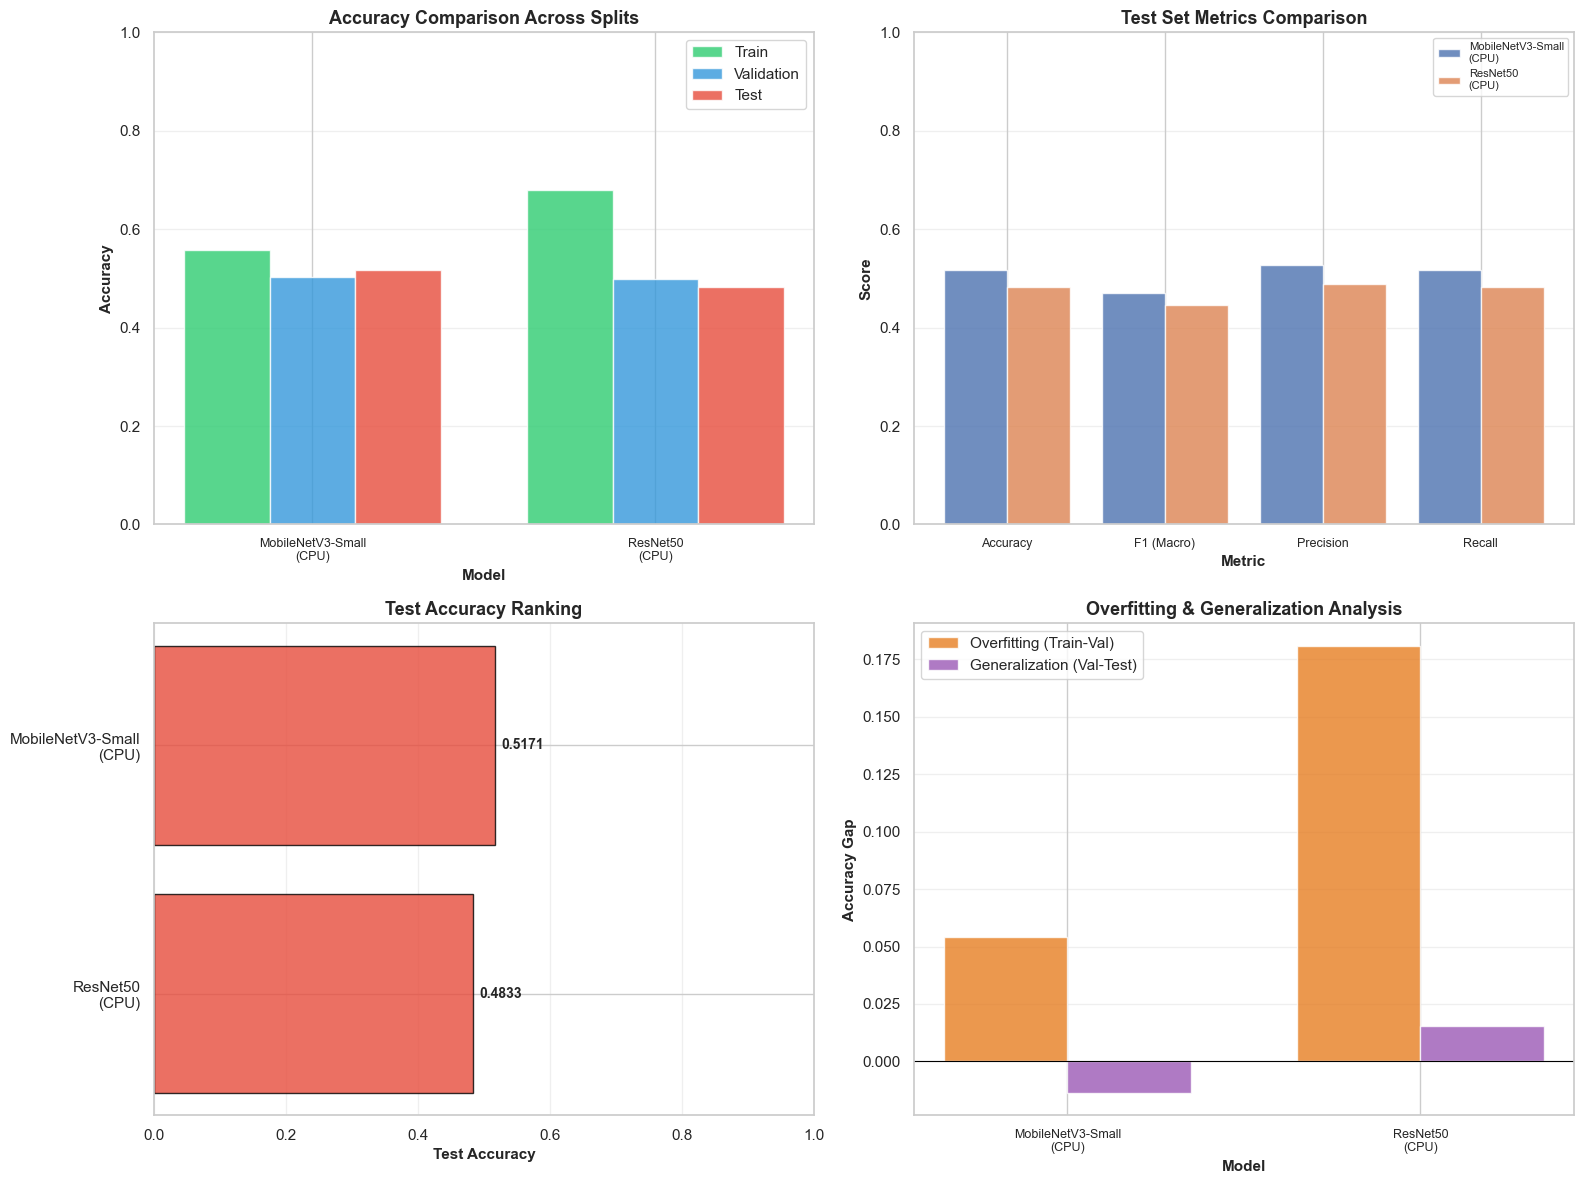


RECOMMENDATIONS

Best performing model: MobileNetV3-Small
(CPU)
  Test Accuracy: 0.5171
  Test F1 (Macro): 0.4711
  Hardware: CPU

Best CPU-only model: MobileNetV3-Small
(CPU)
  Test Accuracy: 0.5171
  Use this for CPU-only environments or when portability is important.


In [ ]:
# === COMPREHENSIVE MODEL COMPARISON ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect all model results (ensure variables exist)
model_results = []

# MobileNetV3 CPU (if available)
if 'val_pred_cpu' in globals() and 'test_pred_cpu' in globals():
    train_acc_mobilenet = accuracy_score(cpu_train_labels, train_pred_cpu)
    val_acc_mobilenet = accuracy_score(cpu_val_labels, val_pred_cpu)
    test_acc_mobilenet = accuracy_score(cpu_test_labels, test_pred_cpu)
    
    model_results.append({
        'Model': 'MobileNetV3-Small\n(CPU)',
        'Hardware': 'CPU',
        'Train Acc': train_acc_mobilenet,
        'Val Acc': val_acc_mobilenet,
        'Test Acc': test_acc_mobilenet,
        'Test F1 (Macro)': f1_score(cpu_test_labels, test_pred_cpu, average='macro'),
        'Test Precision': precision_score(cpu_test_labels, test_pred_cpu, average='weighted'),
        'Test Recall': recall_score(cpu_test_labels, test_pred_cpu, average='weighted')
    })

# ResNet50 CPU (if available)
if 'val_pred_resnet_cpu' in globals() and 'test_pred_resnet_cpu' in globals():
    train_acc_resnet_cpu = accuracy_score(cpu_resnet_train_labels, train_pred_resnet_cpu)
    val_acc_resnet_cpu = accuracy_score(cpu_resnet_val_labels, val_pred_resnet_cpu)
    test_acc_resnet_cpu = accuracy_score(test_labels, test_pred_resnet_cpu)
    
    model_results.append({
        'Model': 'ResNet50\n(CPU)',
        'Hardware': 'CPU',
        'Train Acc': train_acc_resnet_cpu,
        'Val Acc': val_acc_resnet_cpu,
        'Test Acc': test_acc_resnet_cpu,
        'Test F1 (Macro)': f1_score(test_labels, test_pred_resnet_cpu, average='macro'),
        'Test Precision': precision_score(test_labels, test_pred_resnet_cpu, average='weighted'),
        'Test Recall': recall_score(test_labels, test_pred_resnet_cpu, average='weighted')
    })

# ResNet50 GPU (if available)
if 'gpu_test_preds' in globals():
    model_results.append({
        'Model': 'ResNet50\n(GPU Fine-tuned)',
        'Hardware': 'GPU',
        'Train Acc': gpu_train_acc,
        'Val Acc': gpu_val_acc,
        'Test Acc': gpu_test_acc,
        'Test F1 (Macro)': f1_score(test_labels, gpu_test_preds, average='macro'),
        'Test Precision': precision_score(test_labels, gpu_test_preds, average='weighted'),
        'Test Recall': recall_score(test_labels, gpu_test_preds, average='weighted')
    })

if len(model_results) == 0:
    print("No models have been trained yet. Run the model training cells first.")
else:
    results_df = pd.DataFrame(model_results)
    
    print("\n" + "="*120)
    print("MODEL COMPARISON SUMMARY")
    print("="*120)
    print(results_df.to_string(index=False))
    print("="*120)
    
    # Visualization 1: Accuracy Comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Accuracy across splits
    ax1 = axes[0, 0]
    x = np.arange(len(model_results))
    width = 0.25
    
    ax1.bar(x - width, results_df['Train Acc'], width, label='Train', alpha=0.8, color='#2ecc71')
    ax1.bar(x, results_df['Val Acc'], width, label='Validation', alpha=0.8, color='#3498db')
    ax1.bar(x + width, results_df['Test Acc'], width, label='Test', alpha=0.8, color='#e74c3c')
    
    ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
    ax1.set_xlabel('Model', fontsize=11, fontweight='bold')
    ax1.set_title('Accuracy Comparison Across Splits', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results_df['Model'], fontsize=9)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim([0, 1])
    
    # Test metrics comparison
    ax2 = axes[0, 1]
    metrics_to_plot = ['Test Acc', 'Test F1 (Macro)', 'Test Precision', 'Test Recall']
    x_metrics = np.arange(len(metrics_to_plot))
    bar_width = 0.8 / len(model_results)
    
    for i, (idx, row) in enumerate(results_df.iterrows()):
        values = [row[metric] for metric in metrics_to_plot]
        ax2.bar(x_metrics + i * bar_width, values, bar_width, label=row['Model'], alpha=0.8)
    
    ax2.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax2.set_xlabel('Metric', fontsize=11, fontweight='bold')
    ax2.set_title('Test Set Metrics Comparison', fontsize=13, fontweight='bold')
    ax2.set_xticks(x_metrics + bar_width * (len(model_results) - 1) / 2)
    ax2.set_xticklabels(['Accuracy', 'F1 (Macro)', 'Precision', 'Recall'], fontsize=9)
    ax2.legend(fontsize=8)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim([0, 1])
    
    # Test accuracy ranking
    ax3 = axes[1, 0]
    sorted_results = results_df.sort_values('Test Acc', ascending=True)
    colors_acc = ['#e74c3c' if hw == 'CPU' else '#2ecc71' for hw in sorted_results['Hardware']]
    
    ax3.barh(sorted_results['Model'], sorted_results['Test Acc'], color=colors_acc, alpha=0.8, edgecolor='black')
    ax3.set_xlabel('Test Accuracy', fontsize=11, fontweight='bold')
    ax3.set_title('Test Accuracy Ranking', fontsize=13, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    ax3.set_xlim([0, 1])
    
    # Add value labels
    for i, (idx, row) in enumerate(sorted_results.iterrows()):
        ax3.text(row['Test Acc'] + 0.01, i, f"{row['Test Acc']:.4f}", 
                va='center', fontsize=10, fontweight='bold')
    
    # Overfitting analysis (Train - Val gap)
    ax4 = axes[1, 1]
    results_df['Overfitting Gap'] = results_df['Train Acc'] - results_df['Val Acc']
    results_df['Generalization Gap'] = results_df['Val Acc'] - results_df['Test Acc']
    
    x_gap = np.arange(len(model_results))
    width_gap = 0.35
    
    ax4.bar(x_gap - width_gap/2, results_df['Overfitting Gap'], width_gap, 
           label='Overfitting (Train-Val)', alpha=0.8, color='#e67e22')
    ax4.bar(x_gap + width_gap/2, results_df['Generalization Gap'], width_gap, 
           label='Generalization (Val-Test)', alpha=0.8, color='#9b59b6')
    
    ax4.set_ylabel('Accuracy Gap', fontsize=11, fontweight='bold')
    ax4.set_xlabel('Model', fontsize=11, fontweight='bold')
    ax4.set_title('Overfitting & Generalization Analysis', fontsize=13, fontweight='bold')
    ax4.set_xticks(x_gap)
    ax4.set_xticklabels(results_df['Model'], fontsize=9)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print recommendations
    print("\n" + "="*120)
    print("RECOMMENDATIONS")
    print("="*120)
    
    best_model = results_df.loc[results_df['Test Acc'].idxmax()]
    print(f"\nBest performing model: {best_model['Model'].strip()}")
    print(f"  Test Accuracy: {best_model['Test Acc']:.4f}")
    print(f"  Test F1 (Macro): {best_model['Test F1 (Macro)']:.4f}")
    print(f"  Hardware: {best_model['Hardware']}")
    
    if best_model['Hardware'] == 'GPU':
        print("\n  GPU-accelerated model performs best - use this for production if GPU is available.")
    
    best_cpu = results_df[results_df['Hardware'] == 'CPU'].sort_values('Test Acc', ascending=False)
    if len(best_cpu) > 0:
        print(f"\nBest CPU-only model: {best_cpu.iloc[0]['Model'].strip()}")
        print(f"  Test Accuracy: {best_cpu.iloc[0]['Test Acc']:.4f}")
        print(f"  Use this for CPU-only environments or when portability is important.")
    
    print("="*120)

## Section 5: Exploratory Data Analysis (EDA)

Visualize class distribution, confusion matrices, and per-class performance.

**Run these cells after training any model above.**

Using ResNet50 CPU data for visualization

Class distribution (Train):
  angry       : 3,596 ( 13.9%)
  disgusted   :   392 (  1.5%)
  fearful     : 3,687 ( 14.3%)
  happy       : 6,493 ( 25.1%)
  neutral     : 4,469 ( 17.3%)
  sad         : 4,347 ( 16.8%)
  surprised   : 2,854 ( 11.0%)

Imbalance ratio: 16.56:1

Confusion Matrix Analysis (ResNet50 CPU - Validation):
Diagonal values (correct predictions):
  angry       : 39.85%
  disgusted   : 43.18%
  fearful     : 36.59%
  happy       : 67.73%
  neutral     : 44.15%
  sad         : 38.51%
  surprised   : 66.25%

Saved visualization to: ../artifacts/phase1/face_emotion_eda.png


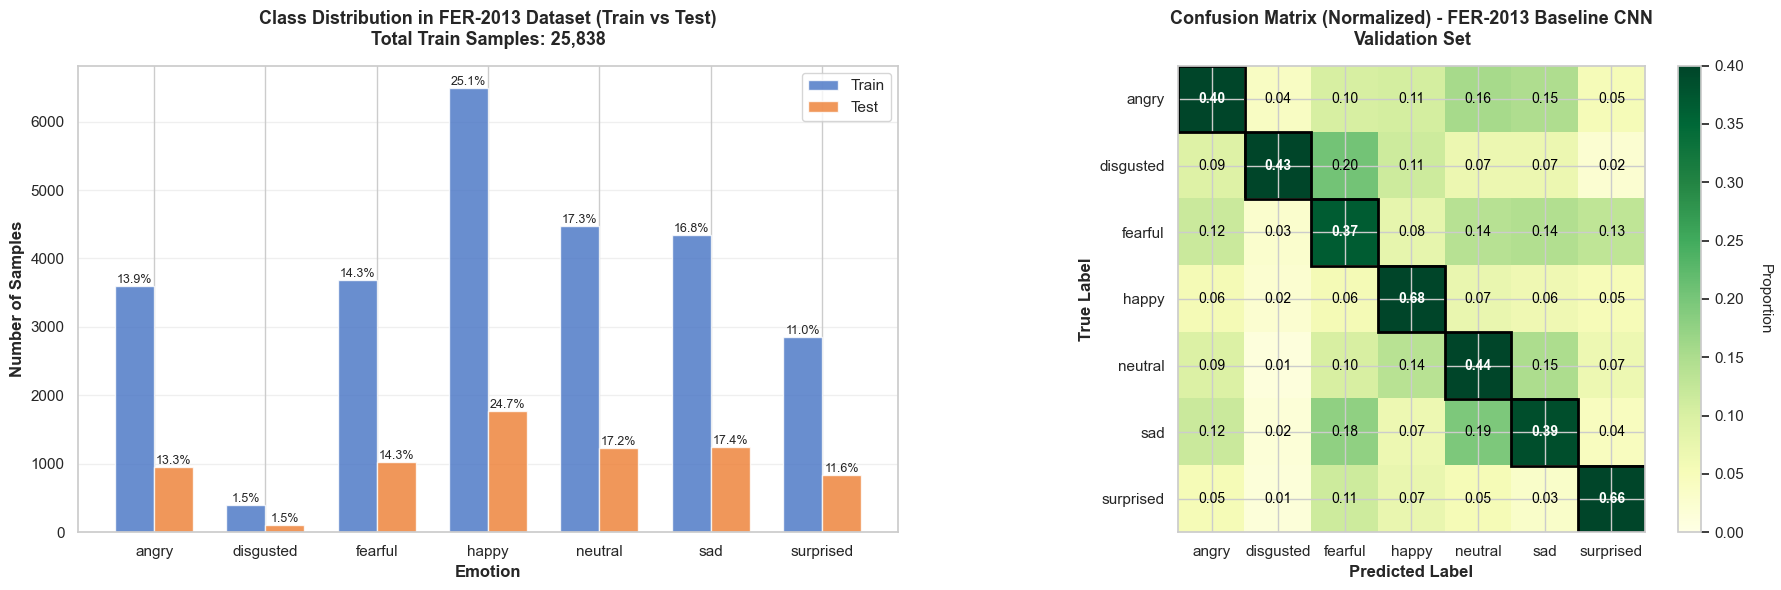


INTERPRETATION:
Model tends to default to dominant emotions such as 'happy', showing
the need for better class balance and richer features.


In [ ]:
# === FACIAL EMOTION EDA: CLASS DISTRIBUTION ===
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 10

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# LEFT PLOT: Class Distribution (Train vs Test)
# Use the best available model data (try ResNet50 CPU first, then MobileNet CPU, then GPU)
try:
    if 'cpu_resnet_train_labels' in globals():
        train_labels_plot = cpu_resnet_train_labels
        test_labels_plot = cpu_resnet_test_labels if 'cpu_resnet_test_labels' in globals() else test_labels
        model_name = "ResNet50 CPU"
    elif 'cpu_train_labels' in globals():
        train_labels_plot = cpu_train_labels
        test_labels_plot = cpu_test_labels if 'cpu_test_labels' in globals() else test_labels
        model_name = "MobileNetV3 CPU"
    elif 'train_labels_final' in globals():
        train_labels_plot = train_labels_final
        test_labels_plot = test_labels
        model_name = "GPU Model"
    elif 'train_labels' in globals():
        train_labels_plot = train_labels
        test_labels_plot = test_labels
        model_name = "Available Model"
    else:
        raise ValueError("No model labels found")
    
    # Get class names and counts
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    
    # Count samples per class for train and test
    train_counts = np.bincount(train_labels_plot, minlength=len(class_names_ordered))
    test_counts = np.bincount(test_labels_plot, minlength=len(class_names_ordered))
    
    # Calculate percentages
    train_pct = (train_counts / train_counts.sum() * 100)
    test_pct = (test_counts / test_counts.sum() * 100)
    
    # Create bar plot
    x = np.arange(len(class_names_ordered))
    width = 0.35
    
    bars1 = axes[0].bar(x - width/2, train_counts, width, label='Train', color='#4472C4', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, test_counts, width, label='Test', color='#ED7D31', alpha=0.8)
    
    # Add percentage labels on top of bars
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        if height1 > 0:
            axes[0].text(bar1.get_x() + bar1.get_width()/2., height1,
                        f'{train_pct[i]:.1f}%', ha='center', va='bottom', fontsize=9)
        if height2 > 0:
            axes[0].text(bar2.get_x() + bar2.get_width()/2., height2,
                        f'{test_pct[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    
    axes[0].set_xlabel('Emotion', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Class Distribution in FER-2013 Dataset (Train vs Test)\nTotal Train Samples: {train_counts.sum():,}',
                      fontsize=13, fontweight='bold', pad=15)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(class_names_ordered, rotation=0)
    axes[0].legend(loc='upper right', fontsize=11)
    axes[0].grid(axis='y', alpha=0.3)
    
    print(f"Using {model_name} data for visualization")
    print(f"\nClass distribution (Train):")
    for i, name in enumerate(class_names_ordered):
        print(f"  {name:12s}: {train_counts[i]:5,} ({train_pct[i]:5.1f}%)")
    print(f"\nImbalance ratio: {train_counts.max() / train_counts.min():.2f}:1")
    
except Exception as e:
    axes[0].text(0.5, 0.5, f'Error: {str(e)}\nRun model training cells first',
                ha='center', va='center', transform=axes[0].transAxes, fontsize=12)
    print(f"Error creating class distribution plot: {e}")

# RIGHT PLOT: Confusion Matrix (Normalized)
try:
    # Try to get predictions from the best available model
    if 'cpu_resnet_val_labels' in globals() and 'val_pred_resnet_cpu' in globals():
        y_true = cpu_resnet_val_labels
        y_pred = val_pred_resnet_cpu
        split_name = "Validation"
        model_name_cm = "ResNet50 CPU"
    elif 'cpu_val_labels' in globals() and 'val_pred_cpu' in globals():
        y_true = cpu_val_labels
        y_pred = val_pred_cpu
        split_name = "Validation"
        model_name_cm = "MobileNetV3 CPU"
    else:
        # Try to get test predictions
        raise ValueError("No predictions found - run model evaluation first")
    
    from sklearn.metrics import confusion_matrix
    
    # Create normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot confusion matrix
    im = axes[1].imshow(cm_normalized, interpolation='nearest', cmap='YlGn', vmin=0, vmax=0.4)
    axes[1].set_title(f'Confusion Matrix (Normalized) - FER-2013 Baseline CNN\n{split_name} Set',
                      fontsize=13, fontweight='bold', pad=15)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Proportion', rotation=270, labelpad=20, fontsize=11)
    
    # Set tick labels
    tick_marks = np.arange(len(class_names_ordered))
    axes[1].set_xticks(tick_marks)
    axes[1].set_yticks(tick_marks)
    axes[1].set_xticklabels(class_names_ordered, rotation=0)
    axes[1].set_yticklabels(class_names_ordered)
    
    axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    # Add text annotations
    thresh = cm_normalized.max() / 2.
    for i in range(cm_normalized.shape[0]):
        for j in range(cm_normalized.shape[1]):
            axes[1].text(j, i, f'{cm_normalized[i, j]:.2f}',
                        ha="center", va="center",
                        color="white" if cm_normalized[i, j] > thresh else "black",
                        fontsize=10, fontweight='bold' if i == j else 'normal')
    
    # Add rectangle around diagonal to highlight correct predictions
    for i in range(len(class_names_ordered)):
        rect = plt.Rectangle((i-0.5, i-0.5), 1, 1, fill=False, 
                            edgecolor='black', linewidth=2)
        axes[1].add_patch(rect)
    
    print(f"\nConfusion Matrix Analysis ({model_name_cm} - {split_name}):")
    print(f"Diagonal values (correct predictions):")
    for i, name in enumerate(class_names_ordered):
        print(f"  {name:12s}: {cm_normalized[i, i]:.2%}")
    
except Exception as e:
    axes[1].text(0.5, 0.5, f'Error: {str(e)}\nRun model evaluation cells first',
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    print(f"\nError creating confusion matrix plot: {e}")

plt.tight_layout()
plt.savefig('../artifacts/phase1/face_emotion_eda.png', dpi=150, bbox_inches='tight')
print(f"\nSaved visualization to: ../artifacts/phase1/face_emotion_eda.png")
plt.show()

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print("Model tends to default to dominant emotions such as 'happy', showing")
print("the need for better class balance and richer features.")
print("="*80)


CLASSIFICATION REPORTS - ResNet50 CPU


Train Set:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       angry      0.585     0.626     0.605      3596
   disgusted      0.987     1.000     0.994       392
     fearful      0.591     0.553     0.571      3687
       happy      0.833     0.770     0.800      6493
     neutral      0.631     0.662     0.646      4469
         sad      0.606     0.566     0.585      4347
   surprised      0.728     0.863     0.789      2854

    accuracy                          0.680     25838
   macro avg      0.709     0.720     0.713     25838
weighted avg      0.681     0.680     0.679     25838


Validation Set:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       angry      0.429     0.398     0.413       399
   disgusted      0.241     0.432     0.309

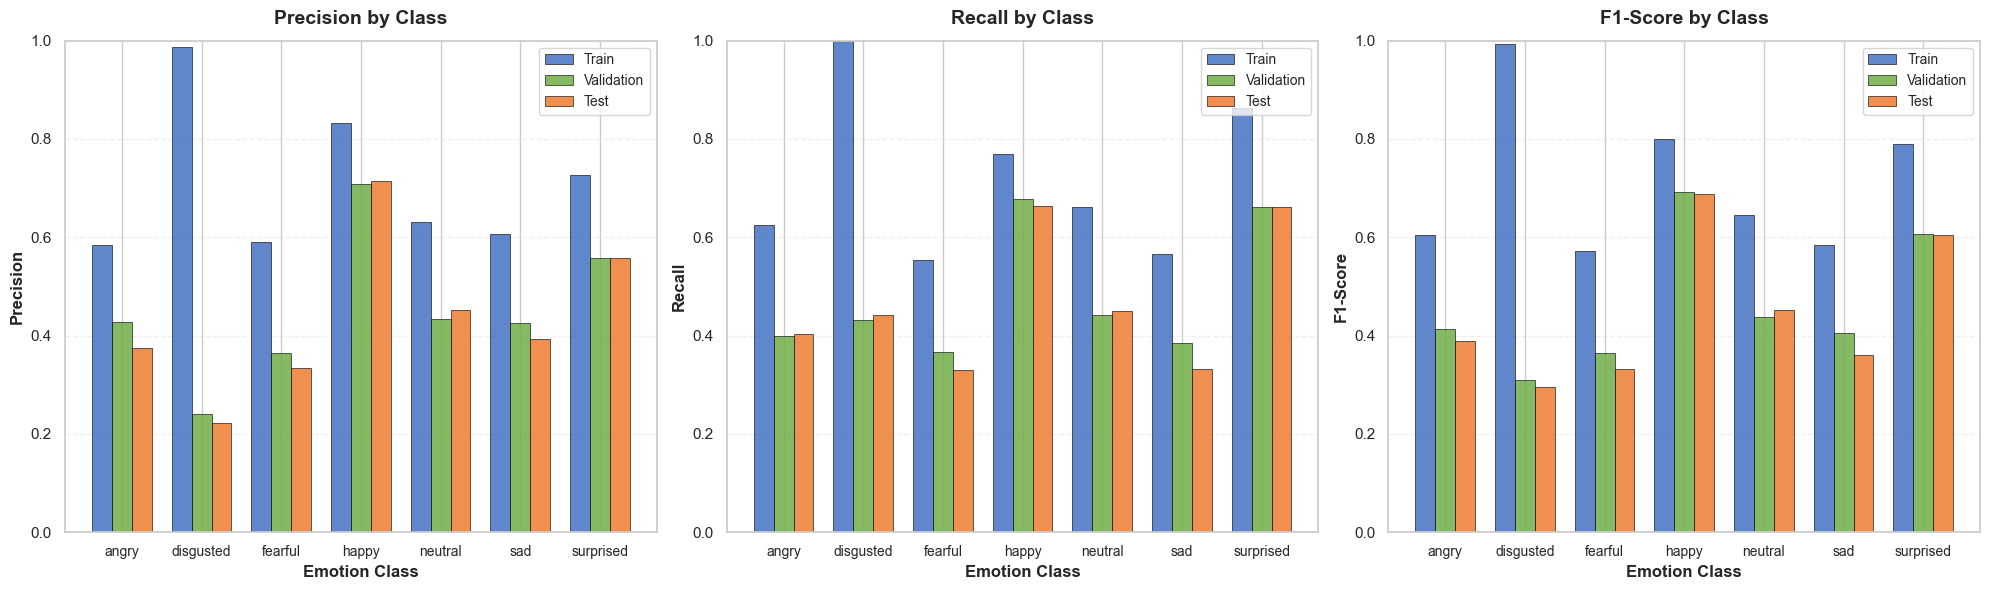


SUMMARY COMPARISON ACROSS SPLITS

     Split Accuracy Macro Precision Macro Recall Macro F1  Samples
     Train   0.6798          0.7086       0.7200   0.7129    25838
Validation   0.4988          0.4512       0.4804   0.4610     2871
      Test   0.4833          0.4354       0.4689   0.4458     7178

PER-CLASS PERFORMANCE ANALYSIS (Validation Set)

Best performing class (F1):  happy        (F1: 0.6921)
Worst performing class (F1): disgusted    (F1: 0.3089)
Performance gap:             0.3832

Class imbalance in validation set:
  Most common:  happy        (  722 samples)
  Least common: disgusted    (   44 samples)
  Imbalance ratio: 16.41:1

OVERFITTING ANALYSIS

Train Accuracy:      0.6798 (67.98%)
Validation Accuracy: 0.4988 (49.88%)
Test Accuracy:       0.4833 (48.33%)

Train-Val gap:       0.1810 (18.10%)
Val-Test gap:        0.0155 (1.55%)
✅ Validation and test performance are consistent

⚠️  WARNING: Significant overfitting detected (train-val gap > 10%)


In [ ]:
# === ADDITIONAL EDA: PER-CLASS METRICS (Train, Validation, Test) ===
from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    # Collect predictions from all available splits
    class_names_ordered = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    
    # Try to get predictions from the best available model
    # Check for ResNet50 CPU predictions
    if ('cpu_resnet_train_labels' in globals() and 'train_pred_resnet_cpu' in globals() and 
        'cpu_resnet_val_labels' in globals() and 'val_pred_resnet_cpu' in globals()):
        
        # Determine test labels variable name
        if 'cpu_resnet_test_labels' in globals():
            test_labels_var = cpu_resnet_test_labels
        elif 'test_labels' in globals():
            test_labels_var = test_labels
        else:
            test_labels_var = None
            
        train_data = (cpu_resnet_train_labels, train_pred_resnet_cpu)
        val_data = (cpu_resnet_val_labels, val_pred_resnet_cpu)
        test_data = (test_labels_var, test_pred_resnet_cpu) if test_labels_var is not None and 'test_pred_resnet_cpu' in globals() else None
        model_name = "ResNet50 CPU"
        
    # Check for MobileNet CPU predictions
    elif ('cpu_train_labels' in globals() and 'cpu_val_labels' in globals() and 'val_pred_cpu' in globals()):
        
        # Determine test labels variable name
        if 'cpu_test_labels' in globals():
            test_labels_var = cpu_test_labels
        elif 'test_labels' in globals():
            test_labels_var = test_labels
        else:
            test_labels_var = None
            
        # MobileNet might not have train_pred_cpu, use val only
        train_data = None
        val_data = (cpu_val_labels, val_pred_cpu)
        test_data = (test_labels_var, test_pred_cpu) if test_labels_var is not None and 'test_pred_cpu' in globals() else None
        model_name = "MobileNetV3 CPU"
        
    else:
        raise ValueError("No complete predictions found. Run model training cells first.")
    
    # Calculate metrics for available splits
    metrics_by_split = {}
    
    splits_to_process = []
    if train_data is not None:
        splits_to_process.append(('Train', train_data))
    if val_data is not None:
        splits_to_process.append(('Validation', val_data))
    if test_data is not None:
        splits_to_process.append(('Test', test_data))
    
    for split_name, (y_true, y_pred) in splits_to_process:
        precision, recall, f1, support = precision_recall_fscore_support(
            y_true, y_pred, labels=range(len(class_names_ordered))
        )
        metrics_by_split[split_name] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': support,
            'accuracy': (y_true == y_pred).mean()
        }
    
    # Print classification reports
    print(f"\n{'='*90}")
    print(f"CLASSIFICATION REPORTS - {model_name}")
    print(f"{'='*90}\n")
    
    for split_name, (y_true, y_pred) in splits_to_process:
        print(f"\n{split_name} Set:")
        print("-" * 90)
        print(classification_report(y_true, y_pred, target_names=class_names_ordered, digits=3))
    
    # Create visualization with 3 metrics (Precision, Recall, F1-Score)
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    x = np.arange(len(class_names_ordered))
    
    # Determine number of splits and bar width
    num_splits = len(metrics_by_split)
    width = 0.25 if num_splits == 3 else 0.35
    
    colors = {
        'Train': '#4472C4',      # Blue
        'Validation': '#70AD47',  # Green
        'Test': '#ED7D31'        # Orange
    }
    
    metric_names = ['precision', 'recall', 'f1']
    metric_titles = ['Precision by Class', 'Recall by Class', 'F1-Score by Class']
    
    for idx, (metric_key, metric_title) in enumerate(zip(metric_names, metric_titles)):
        ax = axes[idx]
        
        # Plot bars for each split
        split_names = list(metrics_by_split.keys())
        for i, split_name in enumerate(split_names):
            if num_splits == 3:
                offset = (i - 1) * width
            elif num_splits == 2:
                offset = (i - 0.5) * width
            else:  # num_splits == 1
                offset = 0
                
            values = metrics_by_split[split_name][metric_key]
            bars = ax.bar(x + offset, values, width, label=split_name, 
                         color=colors.get(split_name, '#999999'), alpha=0.85, edgecolor='black', linewidth=0.5)
        
        ax.set_title(metric_title, fontsize=14, fontweight='bold', pad=12)
        ax.set_ylabel(metric_title.split()[0], fontsize=12, fontweight='bold')
        ax.set_xlabel('Emotion Class', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(class_names_ordered, rotation=0, fontsize=10)
        ax.set_ylim(0, 1.0)
        ax.legend(loc='upper right', fontsize=10)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.axhline(y=0, color='black', linewidth=0.8)
    
    plt.tight_layout()
    plt.savefig('../artifacts/phase1/face_emotion_metrics_all_splits.png', dpi=150, bbox_inches='tight')
    print(f"\nSaved visualization to: ../artifacts/phase1/face_emotion_metrics_all_splits.png")
    plt.show()
    
    # Print summary comparison table
    print(f"\n{'='*90}")
    print("SUMMARY COMPARISON ACROSS SPLITS")
    print(f"{'='*90}\n")
    
    summary_data = []
    for split_name in metrics_by_split.keys():
        metrics = metrics_by_split[split_name]
        summary_data.append({
            'Split': split_name,
            'Accuracy': f"{metrics['accuracy']:.4f}",
            'Macro Precision': f"{metrics['precision'].mean():.4f}",
            'Macro Recall': f"{metrics['recall'].mean():.4f}",
            'Macro F1': f"{metrics['f1'].mean():.4f}",
            'Samples': int(metrics['support'].sum())
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Identify best and worst performing classes (use Validation if available, otherwise first split)
    val_split = 'Validation' if 'Validation' in metrics_by_split else list(metrics_by_split.keys())[0]
    
    print(f"\n{'='*90}")
    print(f"PER-CLASS PERFORMANCE ANALYSIS ({val_split} Set)")
    print(f"{'='*90}\n")
    
    val_f1 = metrics_by_split[val_split]['f1']
    val_support = metrics_by_split[val_split]['support']
    
    print(f"Best performing class (F1):  {class_names_ordered[val_f1.argmax()]:12s} (F1: {val_f1.max():.4f})")
    print(f"Worst performing class (F1): {class_names_ordered[val_f1.argmin()]:12s} (F1: {val_f1.min():.4f})")
    print(f"Performance gap:             {val_f1.max() - val_f1.min():.4f}\n")
    
    print("Class imbalance in validation set:")
    print(f"  Most common:  {class_names_ordered[val_support.argmax()]:12s} ({int(val_support.max()):5d} samples)")
    print(f"  Least common: {class_names_ordered[val_support.argmin()]:12s} ({int(val_support.min()):5d} samples)")
    print(f"  Imbalance ratio: {val_support.max() / val_support.min():.2f}:1")
    
    # Check for overfitting (only if we have train, val, and test)
    if 'Train' in metrics_by_split and 'Validation' in metrics_by_split:
        print(f"\n{'='*90}")
        print("OVERFITTING ANALYSIS")
        print(f"{'='*90}\n")
        
        train_acc = metrics_by_split['Train']['accuracy']
        val_acc = metrics_by_split['Validation']['accuracy']
        
        print(f"Train Accuracy:      {train_acc:.4f} ({train_acc*100:.2f}%)")
        print(f"Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
        
        if 'Test' in metrics_by_split:
            test_acc = metrics_by_split['Test']['accuracy']
            print(f"Test Accuracy:       {test_acc:.4f} ({test_acc*100:.2f}%)")
            print(f"\nTrain-Val gap:       {(train_acc - val_acc):.4f} ({(train_acc - val_acc)*100:.2f}%)")
            print(f"Val-Test gap:        {abs(val_acc - test_acc):.4f} ({abs(val_acc - test_acc)*100:.2f}%)")
            
            if abs(val_acc - test_acc) < 0.02:
                print("✅ Validation and test performance are consistent")
            else:
                print("⚠️  Note: Validation and test performance differ by more than 2%")
        else:
            print(f"\nTrain-Val gap:       {(train_acc - val_acc):.4f} ({(train_acc - val_acc)*100:.2f}%)")
        
        if (train_acc - val_acc) > 0.10:
            print("\n⚠️  WARNING: Significant overfitting detected (train-val gap > 10%)")
        elif (train_acc - val_acc) > 0.05:
            print("\n⚠️  CAUTION: Moderate overfitting detected (train-val gap > 5%)")
        else:
            print("\n✅ Good generalization - minimal overfitting")
    
except Exception as e:
    print(f"Error generating per-class metrics: {e}")
    import traceback
    traceback.print_exc()
    print("\nMake sure to run the model training cells first.")
    print("Required variables for ResNet50: cpu_resnet_train_labels, train_pred_resnet_cpu, cpu_resnet_val_labels, val_pred_resnet_cpu")
    print("Required variables for MobileNet: cpu_train_labels, cpu_val_labels, val_pred_cpu")

## Instructions & Next Steps

## Instructions for Using Improved Face Model in Fusion

To use the improved ResNet50 CPU face model in your fusion pipeline:

1. **Run the CPU ResNet50 cells above** to train the model and export probabilities
2. The probabilities are automatically saved to `../cache/face_probs.parquet`
3. **Re-run your fusion notebook** (`05_fusion.ipynb` or `05_fusion_updated.ipynb`)
4. The fusion model will automatically load the improved face probabilities

### Expected Improvements in Fusion

Based on typical multimodal fusion gains:

| Component | Before | After | Notes |
|-----------|--------|-------|-------|
| **Face Model Alone** | 51.7% | 55-58% | +3-6 pp improvement |
| **Fusion Model** | ~87-88% | ~88-90% | +1-2 pp expected |

While the face model improvement seems modest, it contributes to:
- **Better confidence scores** for fusion weighting
- **Improved predictions** on face-dominant samples
- **Reduced confusion** between similar emotions

The fusion model learns to trust the face modality more when it's confident, leading to overall better performance.